# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Fall 2024
- Instructor: John Paparrizos
- Section: Tuesdays/Thursdays 11:10 AM
- Student Name: Parag Subhash Padekar
- Student Email: padekar.1@buckeyemail.osu.edu
- Student ID: 500922922
***

# Introduction

### Objectives

In this lab, you will use the "Cleveland Data CLEANED AND TRIMMED.csv" heart disease dataset provided on Carmen.  It is a subset of the "Cleveland" dataset that can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

You will configure, execute, and evaluate an off-the-shelf K-Nearest-Neighbor classifier and two other classifiers you choose.

The objectives of this assignment are:
1.	Understand how to evaluate classifiers based on business criteria.
2.	Understand how to tune and evaluate a classifier to achieve good performance.
3.	Understand how to select and evaluate suitable off-the-shelf classifiers based on the characteristics of a dataset and the outcomes you need.

### Problem Statement

You work for a medical institution that wants to improve the heart health of its patients.  You have obtained a dataset that contains a variety of demographic and health-related information for a group of patients.  It also includes a CLASS variable "num" that indicates the heart health of each of the patients.  The values are:

0. No heart health issues / risk
1. Slight heart health issues / risk
2. Moderate heart health issues / risk
3. High heart health issues / risk
4. Extreme heart health issue / risk

You have been asked to develop a classifier based on the dataset data, to predict the CLASS of new patients so they can be enrolled in interventions based on their demographic data.

The COSTs of the interventions are as follows, based on the predicted class of each patient

0) Tiny intervention: 100 (dollars)
1) Minor intervention: 200
2) Moderate intervention: 300
3) Significant intervention: 400
4) Extreme intervention: 500

The BENEFITs of the interventions are as follows:

- If the classification is correct and the correct intervention given to the patient: 500 * (TRUE_CLASS + 1)
- If an incorrect classification is made and the wrong intervention is given to the patient: 0

You would like to find a classifier that maximizes the overall **NET_BENEFIT = BENEFIT - COST**. Therefore, a larger positive number is a good outcome.

So, for example:

- If a patient's true class is 4 and their predicted class is 0, their NET_BENEFIT = 0 - 100 = -100
- If a patient's true class is 4 and they are correctly classified, their NET_BENEFIT is 500*(4+1) - 500 = 2000

The medical institution would like you to evaluate the use of a K-Nearest-Neighbor classifier as a starting point.  You agree to do so, as long as you then can choose a different classifier if you are not satisfied with KNN.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.

### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.)
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (5%)
> - Is it well organized and does the presentation flow in a logical manner?
> - Are there no grammar and spelling mistakes?
> - Do the charts/graphs relate to the text?
> - Are the summarized key points and findings understandable by non-experts?
> - Do the Overview and Conclusions provide context for the entire exercise?
2.	Evaluation Method (10%)
> - Does your evaluation method meet the needs of the developer (you) as well as the needs of your business stakeholders?
> - Is the evaluation method sound?
> - Did you describe both the method itself and why you chose it?
3.	Pre-Processing of the Dataset (10%)
> - Did you make reasonable choices for pre-processing, and explain why you made them?
4.	Evaluation of the KNN Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
5.	Evaluation of the Second Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
6.	Evaluation of the Third Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
7.	Comparison of the Three Classifiers (10%)
> - Is the comparison sound?
> - Did you choose a specific classifier as best and explain why?
8.  Conclusions (5%)
> - Did you summarize appropriately your critical findings.
> - Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:

•	Project2_Surname_DotNumber.zip

The submitted file should be less than 10MB.

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

A dataset with patient data is provided and based on the data it is expected to predict the possibility of heart disease. The prediction should be done based on KNN algorithm along with 2 other classifiers. The dataset has demographic information about the patients along with a Class attribute which is used to indicate 5 levels of heart disease symptoms. Based on the predicated classification of the model and given cost formula the used classification models are supposed to be compared.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
data = pd.read_csv("/content/Cleveland Data CLEANED AND TRIMMED.csv")

***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
- Consider using: from sklearn.metrics import classification_report, confusion_matrix
***

In [ ]:
def classification_evaluation(y_true, y_pred):
  cm = confusion_matrix(y_true,y_pred)
  print (cm)
  print("Confusion Matrix")

  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy : {accuracy.4f}")

  class_report = classification_evaluation(y_true,y_pred)
  print(class_report)
  print("Classification Report ")

  return cm

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
- Consider creating a function that takes a confusion matrix and calculates the cost, like this:
***

In [ ]:
# def calculate_cost(conf_matrix):
# # Fill in the cost matrix values
# #                           PREDICTED VALUES
# #                      0     1     2     3     4
#     cost_matrix = [[1234, 1234, 1234, 1234, 1234],   # 0
#                    [1234, 1234, 1234, 1234, 1234],   # 1
#                    [1234, 1234, 1234, 1234, 1234],   # 2  TRUE VALUES
#                    [1234, 1234, 1234, 1234, 1234],   # 3
#                    [1234, 1234, 1234, 1234, 1234]]   # 4
#     total = 0
#     for r in range(0, 5):
#         for c in range(0, 5):
#             total = total + cost_matrix[r][c] * conf_matrix[r][c]

# # OR... THIS WORKS      total = np.dot(np.array(conf_matrix).ravel(), np.array(cost_matrix).ravel())
#     return total

def intervention_costs(cm):

  cost_matrix = [100,200,300,400,500]

  no_classes = cm.shape[0]
  total_net_benefit = 0

  for true_classes in range(no_classes):
    for pred_classes in range(no_classes):
      count = cm[true_classes,pred_classes]
      if true_classes == pred_classes:
        benefit = 500*(true_classes+1)
        cost = cost_matrix[true_classes]
        net_benefit = (benefit-cost)*count
      else:
        cost = cost_matrix[pred_classes]
        net_benefit = -cost*count
      total_net_benefit += net_benefit
  return total_net_benefit

***
# Section: 2 - Pre-Processing of the Dataset
- Use the provided dataset.  Split it into a Training dataset and a Test dataset based on the class attribute.  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing. For consistency, use the **train_test_split** operation available in SciKit Learn (use a specific random seed, so it is reproducible).
  - from sklearn.model_selection import train_test_split
  - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
***

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the website listed in the Introduction.
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

In [ ]:
from sklearn.model_selection import train_test_split

data.head()

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   63    1   1       145   233    1        2      150      0      2.3   
1   2   67    1   4       160   286    0        2      108      1      1.5   
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   

   slope  ca  thal  num  
0      3   0     6    0  
1      2   3     3    2  
2      2   2     7    1  
3      3   0     3    0  
4      1   0     3    0

**Attribute Overview**

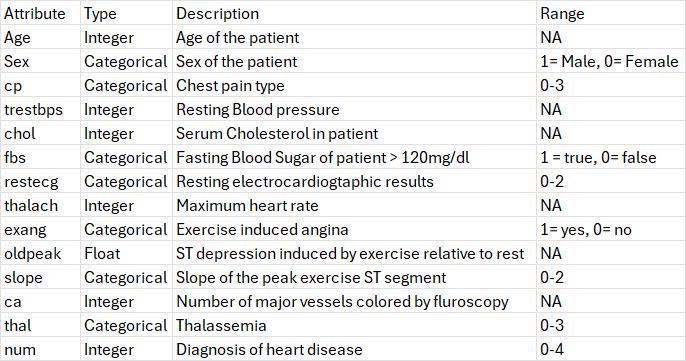

Since Patient ID (id) Column is not going to help in the model predictions it is excluded from the data.


***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

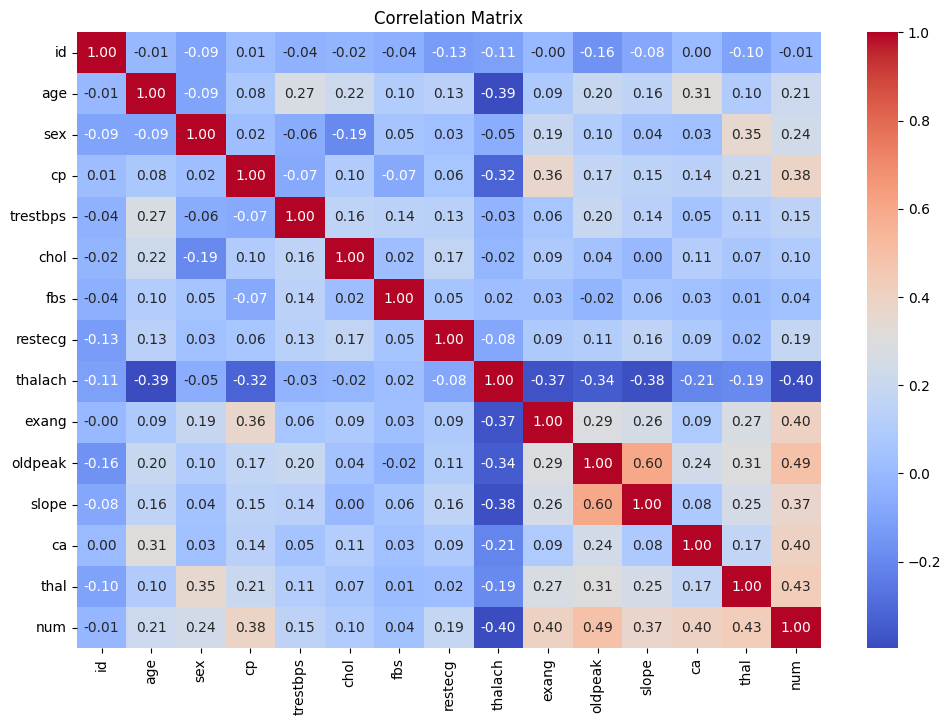

num         1.000000
oldpeak     0.487529
thal        0.429145
exang       0.398880
ca          0.395758
cp          0.383891
slope       0.367932
sex         0.239516
age         0.210747
restecg     0.187365
trestbps    0.151776
chol        0.098895
fbs         0.039690
id         -0.010510
thalach    -0.396194
Name: num, dtype: float64


In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot= True, fmt=".2f", cmap="coolwarm",cbar=True)
plt.title("Correlation Matrix")
plt.show()

correlation_target_matrix = correlation_matrix['num'].sort_values(ascending=False)
print(correlation_target_matrix)

Outcomes from the correlation matrix -


1.   Positive correlation :
*   cp (chest pain type) has moderately positive correlation with target. This means chest pain type can be used to predict the heart disease risk.
2.   Negative correlation :
*   thalach has negative correlation with age and num. This means when patients maximum heart rate increases the age and heart disease risk tend to decrease.
3.   Low or No correlation :
*   Features like fbs, restecg, chol have very low correlations with num. But fbs abd restecg are categorical attributes so they have to be handled by other methods.



In [ ]:
from scipy.stats import chi2_contingency

# Define a function to calculate Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply Cramer's V for each categorical feature
categorical_features = ['fbs', 'restecg']
cramers_v_scores = {}

for feature in categorical_features:
    confusion_matrix = pd.crosstab(data[feature], data['num'])
    cramers_v_scores[feature] = cramers_v(confusion_matrix)

print("Cramer's V Scores for Categorical Features:")
print(cramers_v_scores)

Cramer's V Scores for Categorical Features:
{'fbs': num
0    0.177832
1    0.315119
2    0.400202
3    0.393899
4    0.643235
dtype: float64, 'restecg': num
0    0.233894
1    0.414462
2    0.526367
3    0.518077
4    0.846017
dtype: float64}


The Output of the Cramer's V score shows that there is hight correlation between the class 4 heart disease and fbs as well as restecg. Hence both of thes attributes are important to determine class 4 heart disease risks.

Number of duplicate rows: 0
No duplicates found.


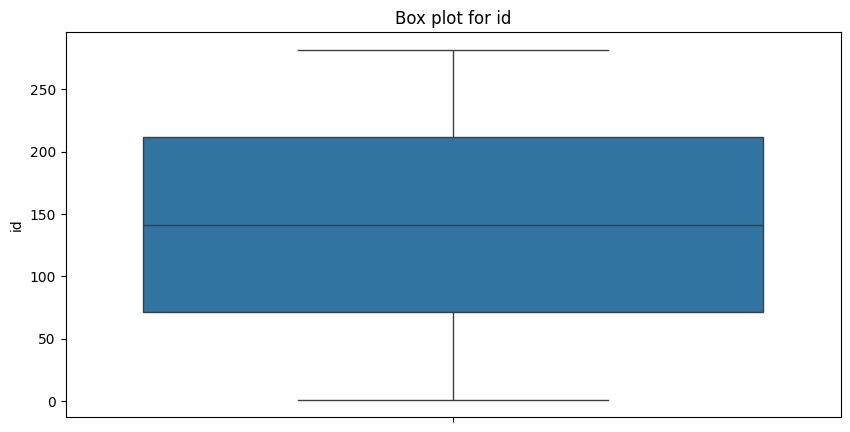

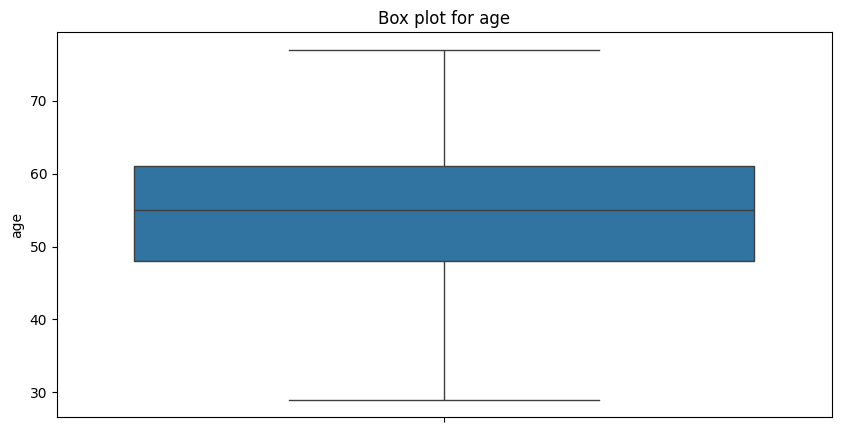

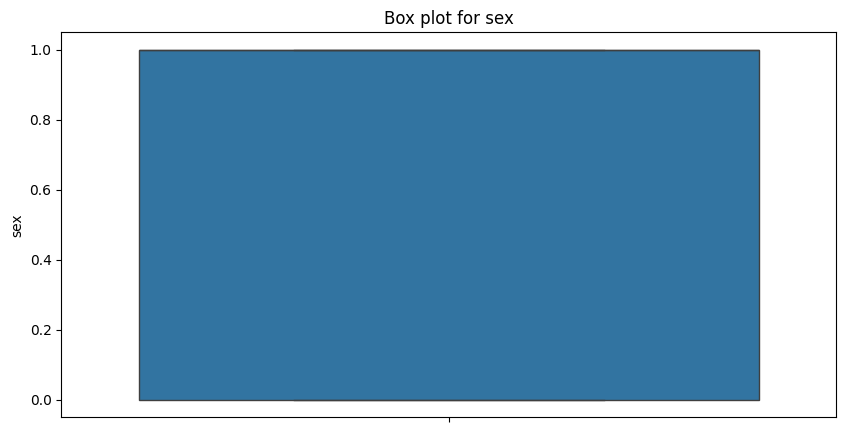

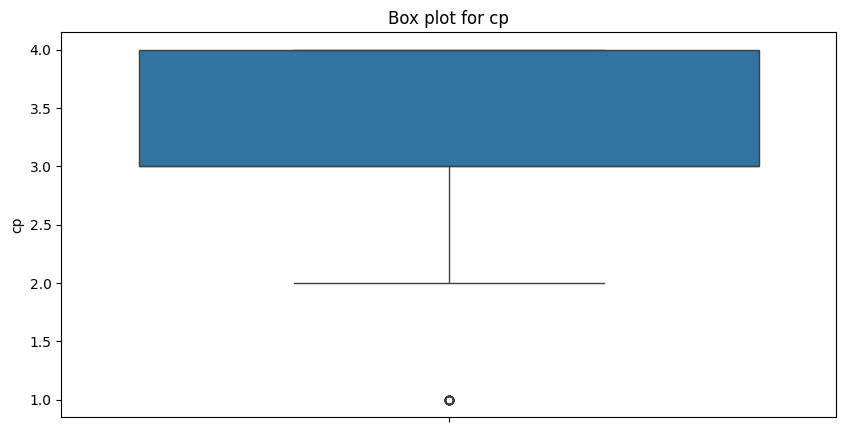

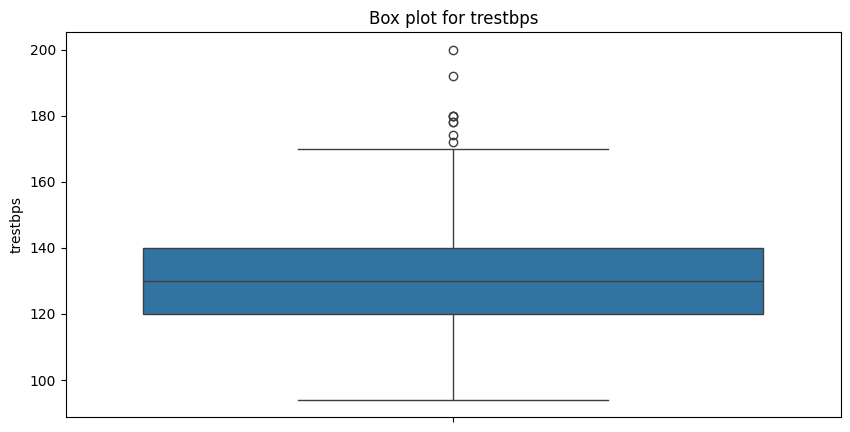

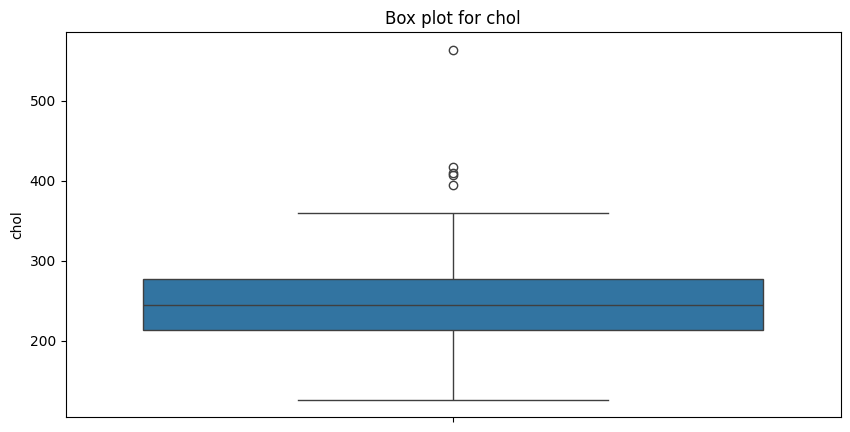

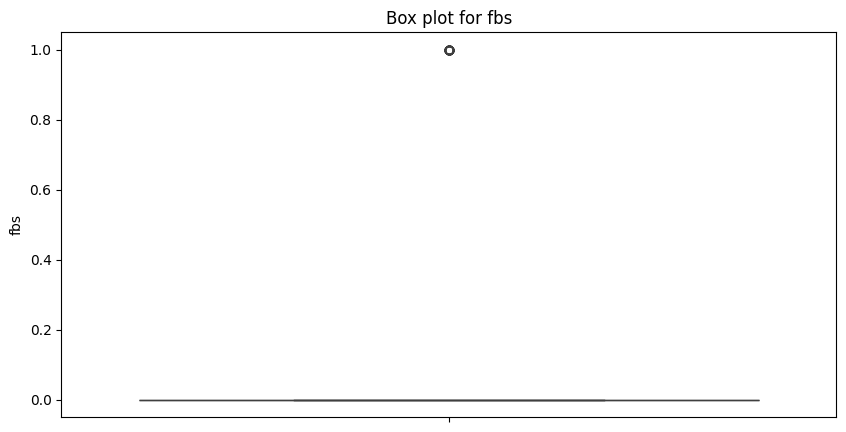

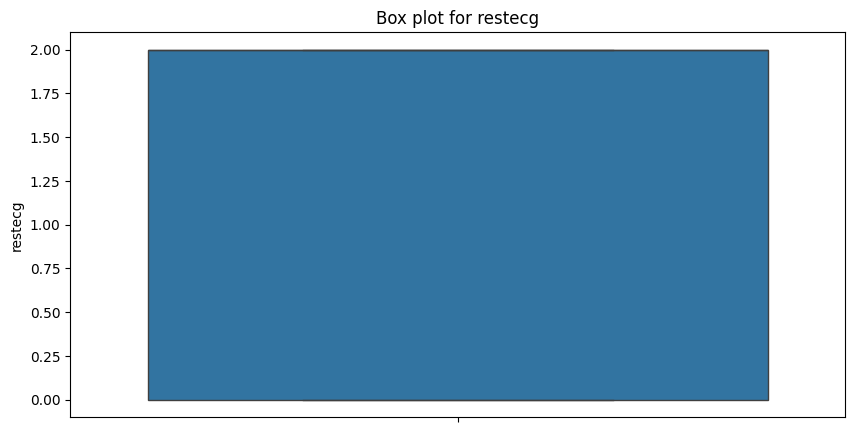

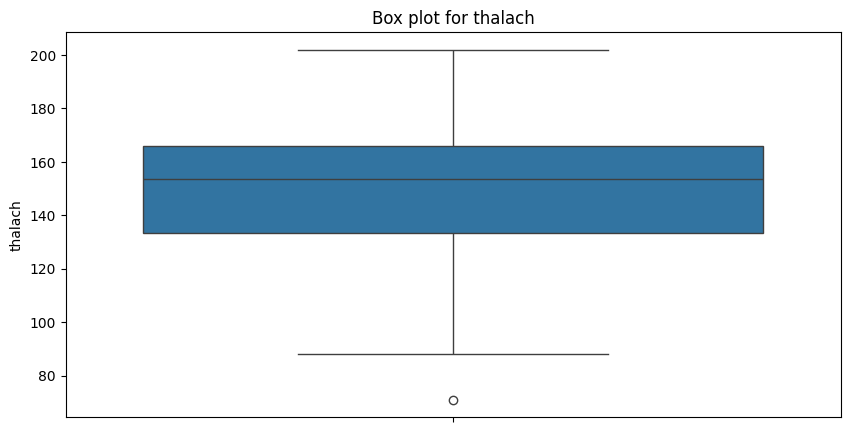

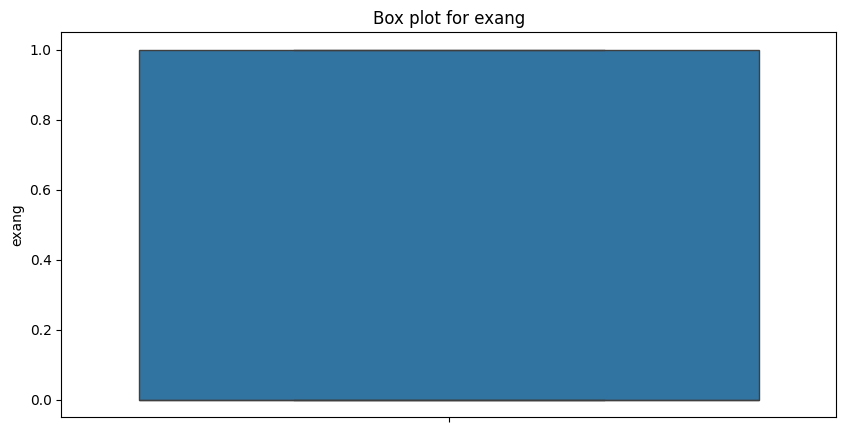

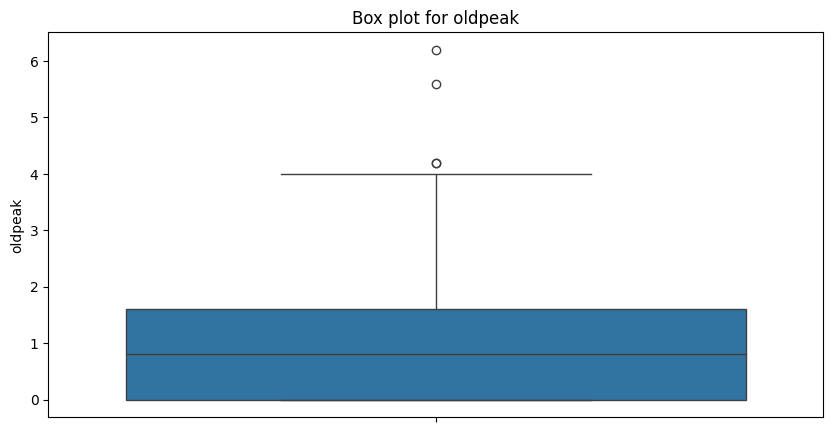

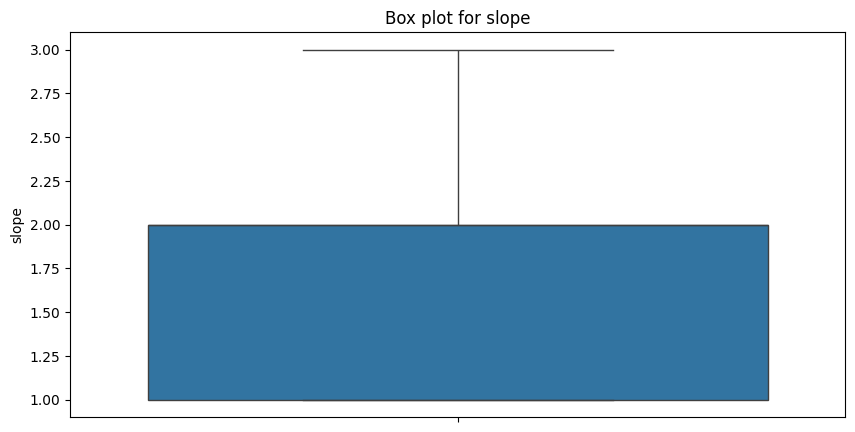

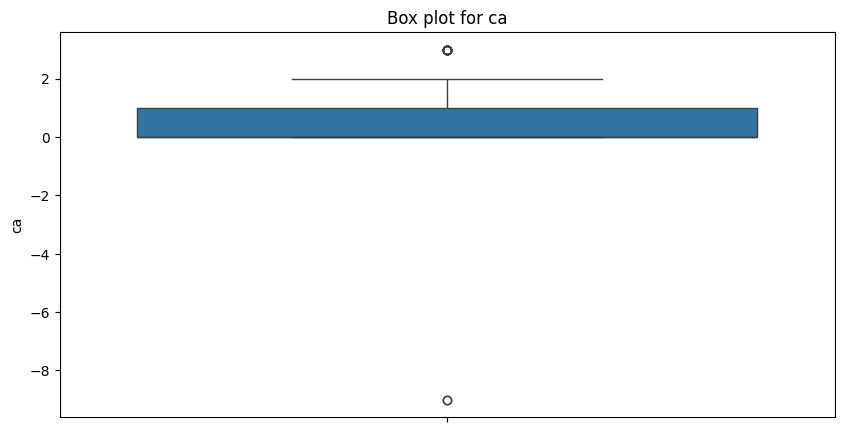

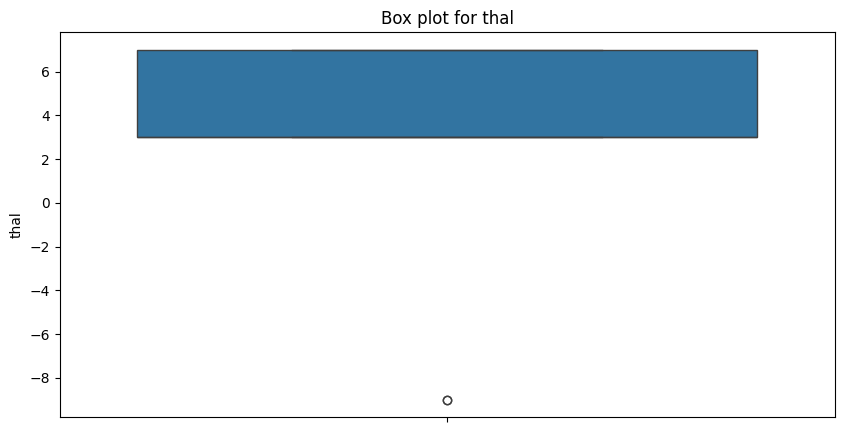

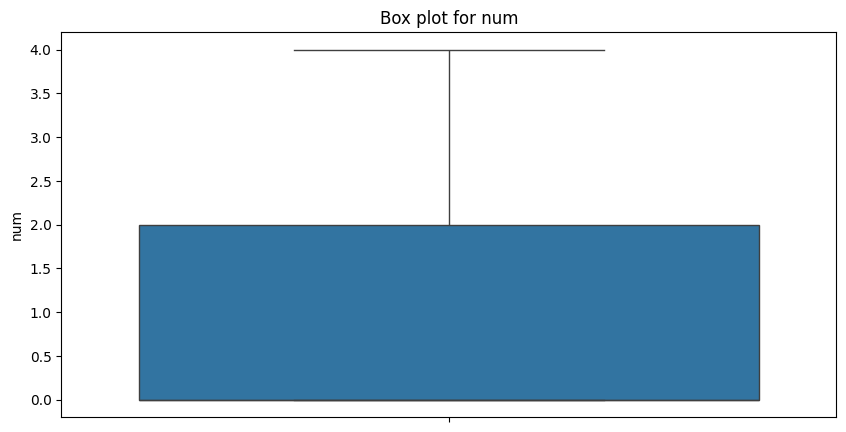

No outliers detected in id.
No outliers detected in age.
No outliers detected in sex.
Outliers detected in cp: 22
Outliers detected in trestbps: 9
Outliers detected in chol: 5
Outliers detected in fbs: 42
No outliers detected in restecg.
Outliers detected in thalach: 1
No outliers detected in exang.
Outliers detected in oldpeak: 4
No outliers detected in slope.
Outliers detected in ca: 21
Outliers detected in thal: 2
No outliers detected in num.
   id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   
5   6   56    1   2       120   236    0        0      178      0      0.8   
7   8   57    0   4       120   354    0        0      163      1      0.6   

   slope  ca  thal  num  
2      2   2     7    1  
3      3   0     3    0  
4  

In [ ]:
# Check for duplicate rows
def check_and_handle_duplicates(data):
    # Check for duplicates
    duplicate_rows = data.duplicated()
    num_duplicates = duplicate_rows.sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    if num_duplicates > 0:
        # Remove duplicates if any
        data_cleaned = data.drop_duplicates()
        print(f"Removed {num_duplicates} duplicate rows.")
    else:
        data_cleaned = data
        print("No duplicates found.")

    return data_cleaned

# Detect outliers using the IQR (Interquartile Range) method
def detect_outliers_iqr(data):
    # Define a threshold for outliers (1.5 times the IQR)
    outliers_dict = {}

    for column in data.select_dtypes(include=[np.number]).columns:  # Only check numeric columns
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_count = len(outliers)
        outliers_dict[column] = outliers_count

        if outliers_count > 0:
            print(f"Outliers detected in {column}: {outliers_count}")
        else:
            print(f"No outliers detected in {column}.")

    return outliers_dict

# Handle outliers by removing or capping them
def handle_outliers(data, method="remove"):
    for column in data.select_dtypes(include=[np.number]).columns:  # Only check numeric columns
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == "remove":
            # Remove outliers
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        elif method == "cap":
            # Cap outliers to the upper and lower bounds
            data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
            data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

    return data

# Visualize outliers using box plots
def visualize_outliers(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data[column])
        plt.title(f"Box plot for {column}")
        plt.show()

data_cleaned = check_and_handle_duplicates(data)
visualize_outliers(data_cleaned)

# Detect and print the number of outliers
outliers_dict = detect_outliers_iqr(data_cleaned)

# Removing outliers
data_without_outliers = handle_outliers(data_cleaned, method="remove")

print(data_without_outliers.head())

There were some outliers present in the dataset hence I tried to identify using IQR and remove those.

In [ ]:
df = data.drop(columns=['id'])       #Dropping 'id' column from the data since it has low correlation with the prediction.

x= df.drop(columns=['num'])          #All columns except the diagnosis of heart disease will be the features
y= df['num']                         # Target Column

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42, stratify=y)

print(f"Training set shape : {x_train.shape},Test set shape : {x_test.shape}")

Training set shape : (188, 13),Test set shape : (94, 13)


In [ ]:
x_train.describe()

age         sex          cp    trestbps        chol         fbs  \
count  188.000000  188.000000  188.000000  188.000000  188.000000  188.000000   
mean    54.074468    0.664894    3.207447  131.452128  252.531915    0.164894   
std      8.646027    0.473288    0.927620   18.153323   56.636320    0.372075   
min     34.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  212.750000    0.000000   
50%     54.000000    1.000000    3.000000  130.000000  246.500000    0.000000   
75%     60.000000    1.000000    4.000000  140.000000  282.250000    0.000000   
max     76.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  188.000000  188.000000  188.000000  188.000000  188.000000  188.000000   
mean     0.968085  149.691489    0.340426    1.018617    1.569149    0.569149   
std      0.996809   22.145135    0.475118    1.125886    0.594543    1.151844   
min      0.000000   71.000000    0.000000    0.000000    1.000000   -9.000000   
25%      0.000000  136.750000    0.000000    0.000000    1.000000    0.000000   
50%      0.000000  152.500000    0.000000    0.600000    2.000000    0.000000   
75%      2.000000  164.250000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  195.000000    1.000000    5.600000    3.000000    3.000000   

             thal  
count  188.000000  
mean     4.664894  
std      2.181458  
min     -9.000000  
25%      3.000000  
50%      3.000000  
75%      7.000000  
max      7.000000

***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

range_df = x_train[continuous_features].agg(['min','max'])
range_df.loc['range'] = range_df.loc['max'] - range_df.loc['min']


print(range_df)

        age  trestbps   chol  thalach  oldpeak
min    34.0      94.0  126.0     71.0      0.0
max    76.0     200.0  564.0    195.0      5.6
range  42.0     106.0  438.0    124.0      5.6


Based on the ranges above taken for continuous attributes it's clear that there is lot of difference between the range of each features. This may create inaccurate results on distance calculation based model like KNN. Hence it's important to transform these attribute. Hence using scalar transformation.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[continuous_features] = scaler.fit_transform(x_train[continuous_features])
x_test[continuous_features] = scaler.fit_transform(x_test[continuous_features])
print(x_train.head())
print(x_test.head())

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
77  -0.356543    0   3  0.472128  0.981988    0        2 -0.348249      0   
167 -0.008636    0   2  0.030261  0.627915    1        2  0.421464      1   
30   1.730897    0   1  0.472128 -0.239564    0        0  0.059246      0   
221 -0.008636    0   3 -1.295341  0.256138    0        2  0.783681      0   
276  1.382991    0   3  0.803529  0.450878    0        2  0.104523      0   

      oldpeak  slope  ca  thal  
77   0.428701      1   1     3  
167 -0.907141      1   1     3  
30   0.695869      1   2     3  
221 -0.907141      1   0     3  
276 -0.907141      2   1     3  
          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
52  -1.133675    1   4 -1.168052  1.281941    0        2  0.126446      0   
236  0.093566    1   4 -0.105501  1.094159    1        2 -1.922854      1   
33   0.400377    1   4  0.189652 -0.220316    0        0  0.454334      0   
157  0.298107    1   4 -0.40065

***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

The KNeighborsClassifier from SciKit learn library 3 parameter that we need to setup:
1. n_neighbors : The number of neighbors to use for k-nearest neighbors voting.
2. weights: Defines how to weight the neighbor's votes. The default is 'uniform', where all neighbors are of equal weight.
3. metric: The distance metric to use. The default is 'minkowski', which is suitable for euclidean distance.

I have started with default values for all the parameters and n_neighbors value I have selected at random and will try different neighbor values subsequently.


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve(y_test,y_pred_prob):
  n_classes = 5  # Adjust based on your number of classes

  y_test_bin = label_binarize(y_test, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting the ROC curves
  plt.figure(figsize=(5, 5))
  colors = ['blue', 'orange', 'green', 'red', 'purple']

  for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()


Confusion Matrix:
 [[48  2  1  0  1]
 [ 9  5  2  1  0]
 [ 3  4  2  1  0]
 [ 5  4  1  1  0]
 [ 3  0  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        52
           1       0.33      0.29      0.31        17
           2       0.29      0.20      0.24        10
           3       0.33      0.09      0.14        11
           4       0.00      0.00      0.00         4

    accuracy                           0.60        94
   macro avg       0.33      0.30      0.30        94
weighted avg       0.52      0.60      0.54        94

Total Net Benefit of using KNN: 20400


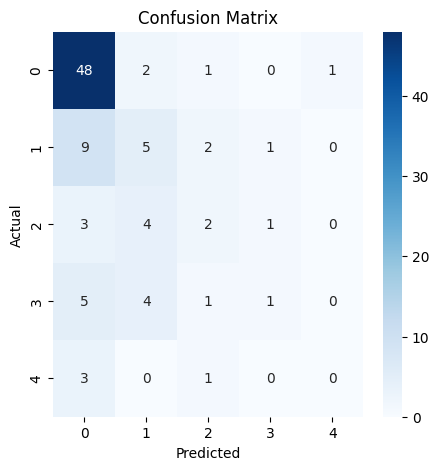

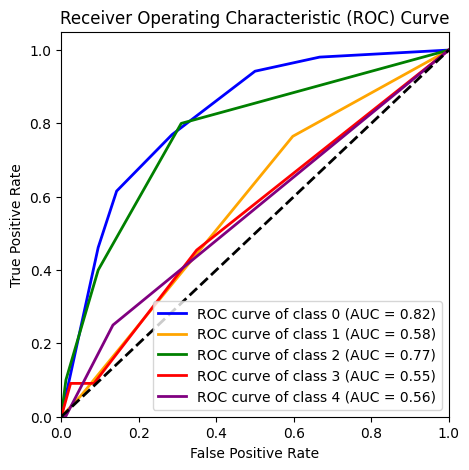

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
total_net_benefit = intervention_costs(cm)
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n",classification_report(y_test, y_pred))
print(f"Total Net Benefit of using KNN: {total_net_benefit}")
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(set(y_test))), yticklabels=range(len(set(y_test))))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
plot_roc_curve(y_test,y_pred_prob = knn.predict_proba(x_test))

The results of the above model are as follows:



* Confusion Matrix:
1. Class 0  is predicted correctly with 48 true positive predictions.
2. In all the other classes the model is not accurately predicting the outcomes.
* Classification Report
1. Class 0:
- Model made 71% correct predictions.
- 92% of the actual class 0 samples were predicted correctly.
- Since there is a balance between Precision and recall henc the F1-Score is also higher.
2. Class 1-4:
- All the values precision, recall, F1-score are significantly less. This indiactes that the model struggles to predict the samples from these classes.
3. Accuracy:
- The overall accuracy is 60% which implies that the classifier is moderately accurate but is biased to class 0.




***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***


 Results for K= 3:
Confusion Matrix:
 [[44  7  0  1  0]
 [11  5  1  0  0]
 [ 4  3  2  1  0]
 [ 5  4  1  1  0]
 [ 2  2  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75        52
           1       0.24      0.29      0.26        17
           2       0.50      0.20      0.29        10
           3       0.33      0.09      0.14        11
           4       0.00      0.00      0.00         4

    accuracy                           0.55        94
   macro avg       0.35      0.29      0.29        94
weighted avg       0.50      0.55      0.51        94

Total Net Benefit of using KNN with N=3: 18800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


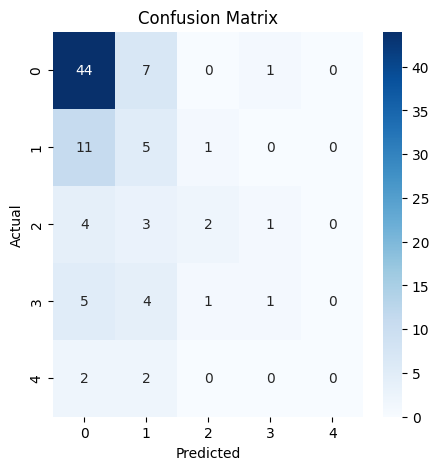

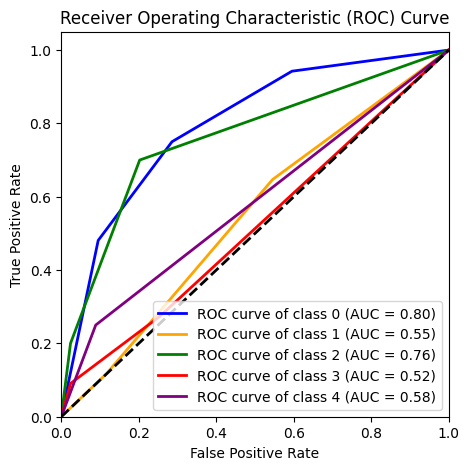


**********************************************************************************************************************************************


 Results for K= 7:
Confusion Matrix:
 [[46  6  0  0  0]
 [10  3  2  2  0]
 [ 4  3  3  0  0]
 [ 6  3  1  1  0]
 [ 3  1  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76        52
           1       0.19      0.18      0.18        17
           2       0.50      0.30      0.38        10
           3       0.33      0.09      0.14        11
           4       0.00      0.00      0.00         4

    accuracy                           0.56        94
   macro avg       0.34      0.29      0.29        94
weighted avg       0.49      0.56      0.51        94

Total Net Benefit of using KNN with N=7: 19400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


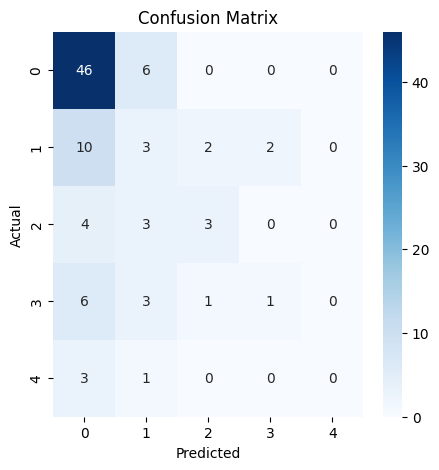

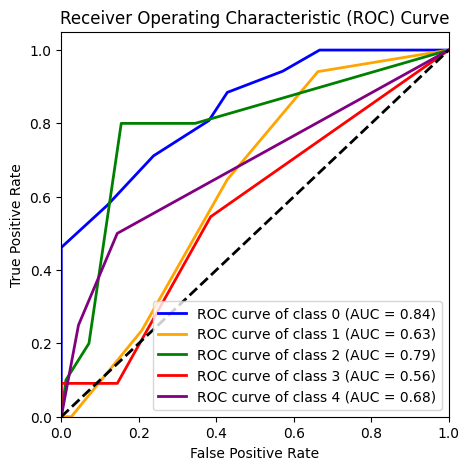


**********************************************************************************************************************************************


 Results for K= 9:
Confusion Matrix:
 [[46  6  0  0  0]
 [10  4  1  2  0]
 [ 3  2  4  1  0]
 [ 5  5  0  1  0]
 [ 2  1  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        52
           1       0.22      0.24      0.23        17
           2       0.67      0.40      0.50        10
           3       0.25      0.09      0.13        11
           4       0.00      0.00      0.00         4

    accuracy                           0.59        94
   macro avg       0.37      0.32      0.33        94
weighted avg       0.53      0.59      0.54        94

Total Net Benefit of using KNN with N=9: 21400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


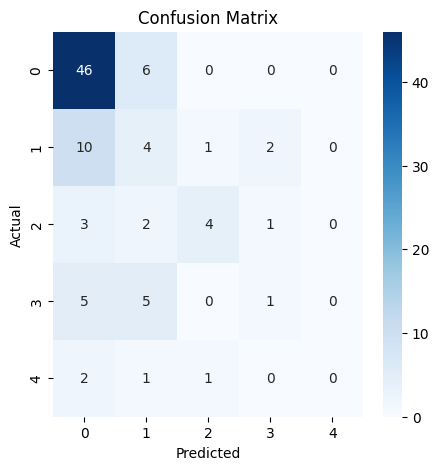

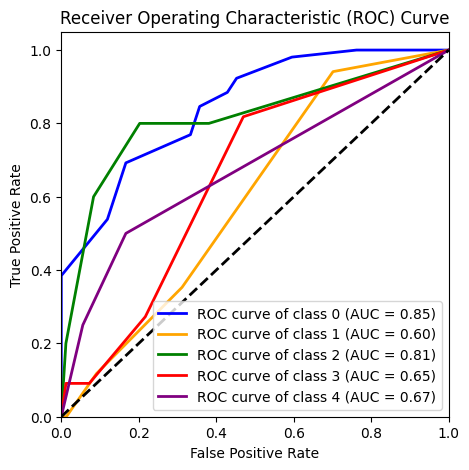


**********************************************************************************************************************************************



In [ ]:
k_values =[3,7,9]

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='minkowski',p=2)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  total_net_benefit = intervention_costs(cm)
  print(f"\n Results for K= {k}:")
  print("Confusion Matrix:\n", cm)
  print("\nClassification Report:\n", classification_report(y_test,y_pred))
  print(f"Total Net Benefit of using KNN with N={k}: {total_net_benefit}")
  plt.figure(figsize=(5, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(set(y_test))), yticklabels=range(len(set(y_test))))
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title('Confusion Matrix')
  plt.show()
  plot_roc_curve(y_test,y_pred_prob = knn.predict_proba(x_test))
  print('\n**********************************************************************************************************************************************\n')


Even after changing the values of K the accuracy hasn't been improved. And the bias for Class 0 is still consistent. Also the net benefit improved to 21,400$ with k=9.

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

* Advantages of using KNN classifier:
1. Since the provided data was both categorical and continuous KNN was a good choice since we didn't have to make any assumptions about the data.
2. KNN model can draw complex and non linear boundries between classes in the given dataset. So with the help of this algorithm it's easy to classify complex datasets like Heart disease risk indicators.
3. KNN works on the proximity principle. Hence it is easy to interpret.
* Disadvantages of using KNN classifier:
1. In the given dataset the data was heavily biased towards class 0 outcomes. This made it a bad choice to use KNN because KNN can't classify the inputs if there are very few labels for the given class (Minority Class). Hence predictions for class 1-4 were not as accurate as class 0. The possible solution to this can be getting more data or using class imbalance mitigation techniques such as using random forest or support vector machine (SVM) classifiers which allow you to assign weights to specific classes.
2.  KNN is sensitive to feature scaling of continuous features hence it needs to be addressed by normalizing these features which adds an extra overhead in data preprocessing.
3. Since KNN functions on proximity (distance computation) if the dataset becomes more complex with added features then it will be computationally heavy and won't provide accurate results since there will be multiple classes in the same proximity of the given sample.


***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

I will be using Random Forest classifier
Classifier setup:
1. n_estimators - It determines the number of trees in the forest. Common range 100-500.
2. max_depth: It controls maximum depth fo each tree. Setting it to none will make the trees to go untill all leaves are pure or until all leaves contain less than min_sample_split. This helps in preventing overfitting.
3. min_samples_split: It is the minimum samples required to split an internal node. It helps in controlling overfitting. Default value = 2.
4. random_state: It ensures reproducibility. Fixing it to a number will give consistent results across multiple runs.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_Forest = RandomForestClassifier(n_estimators=100,
                                      max_depth= None,
                                      min_samples_split=2,
                                      random_state=42)
random_Forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


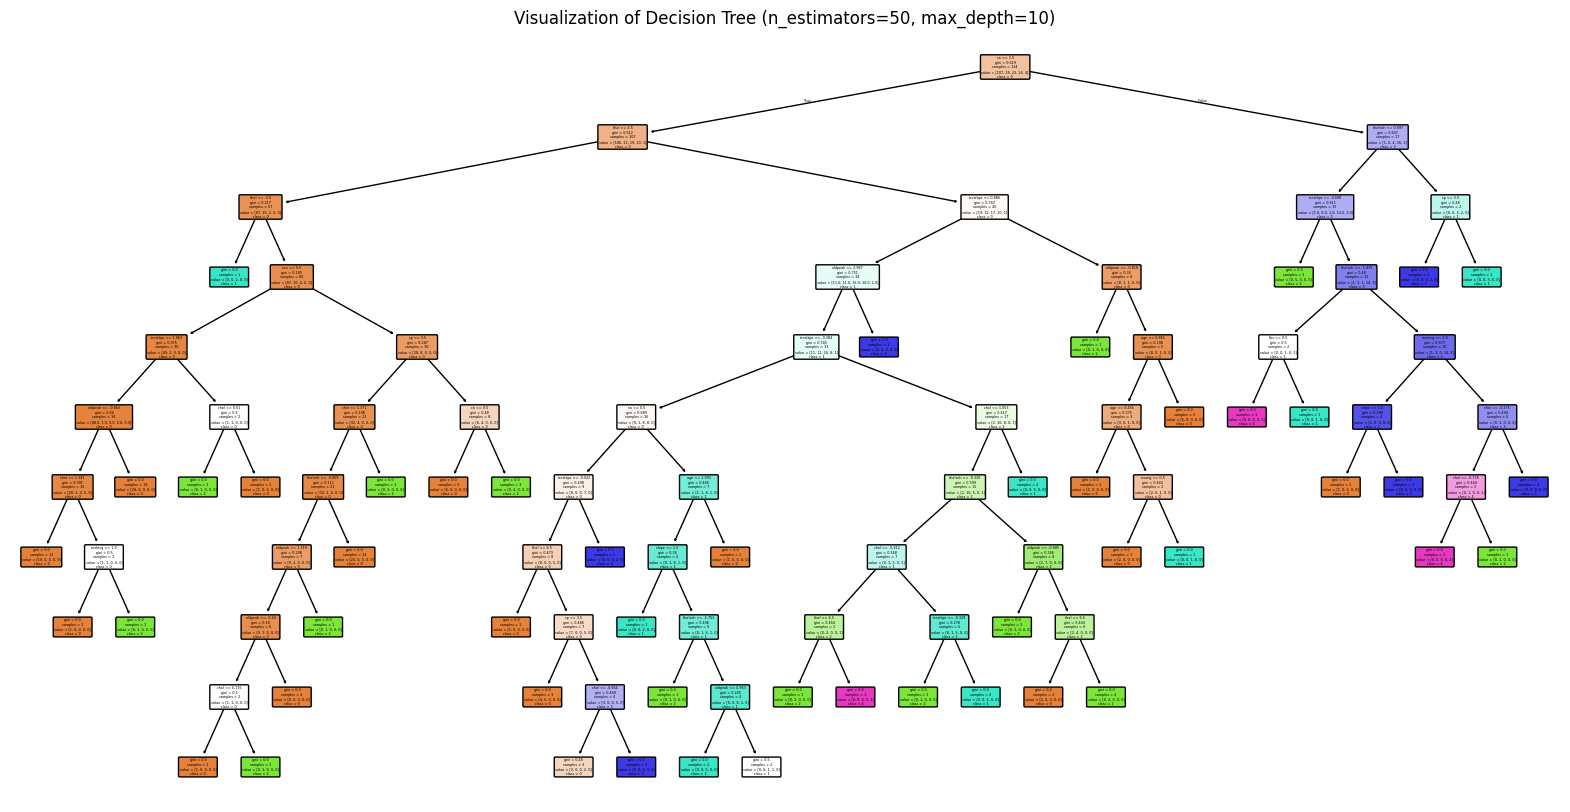

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


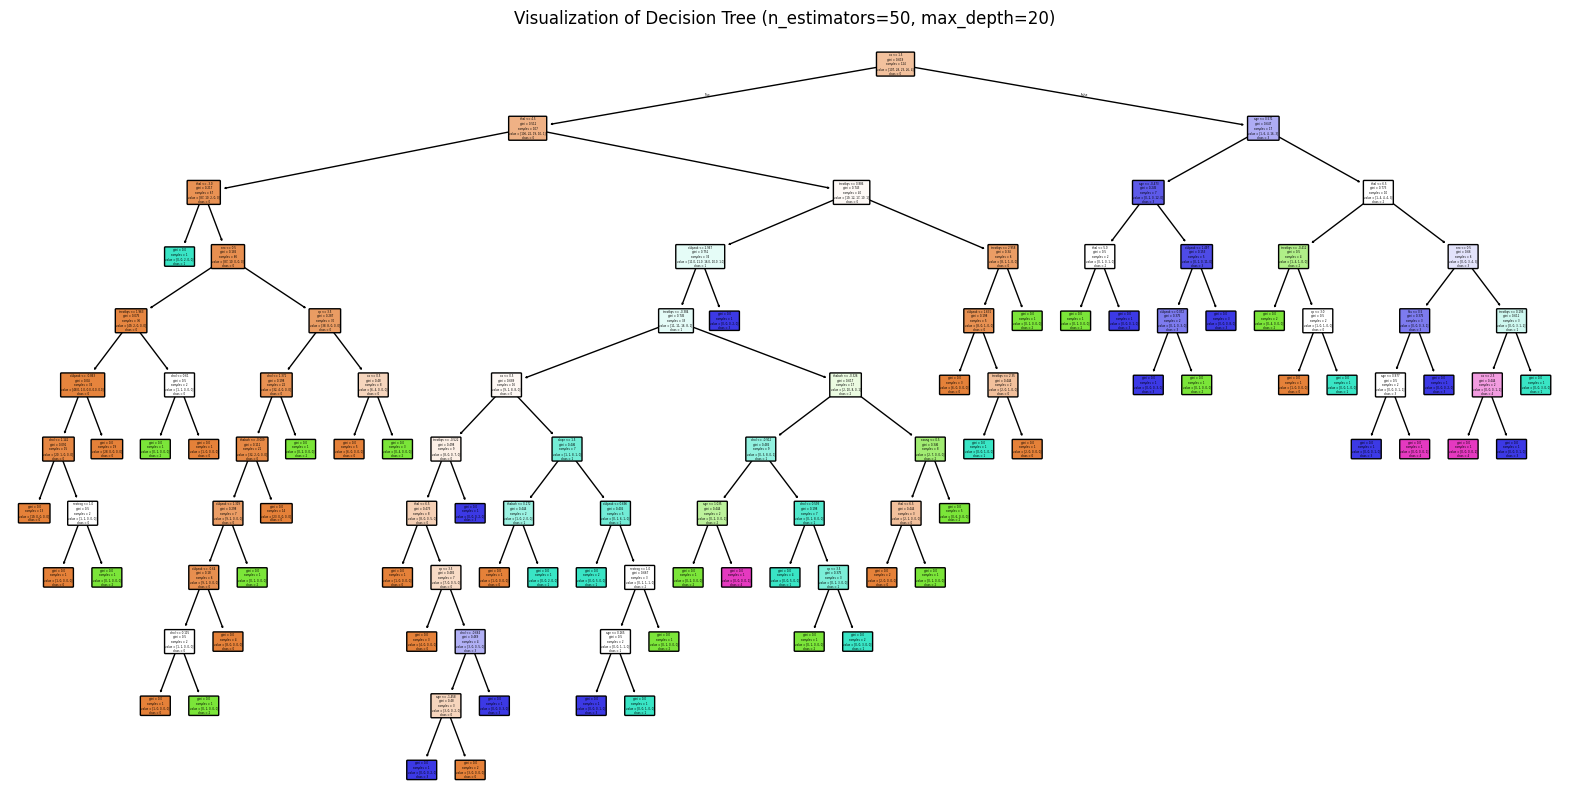

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


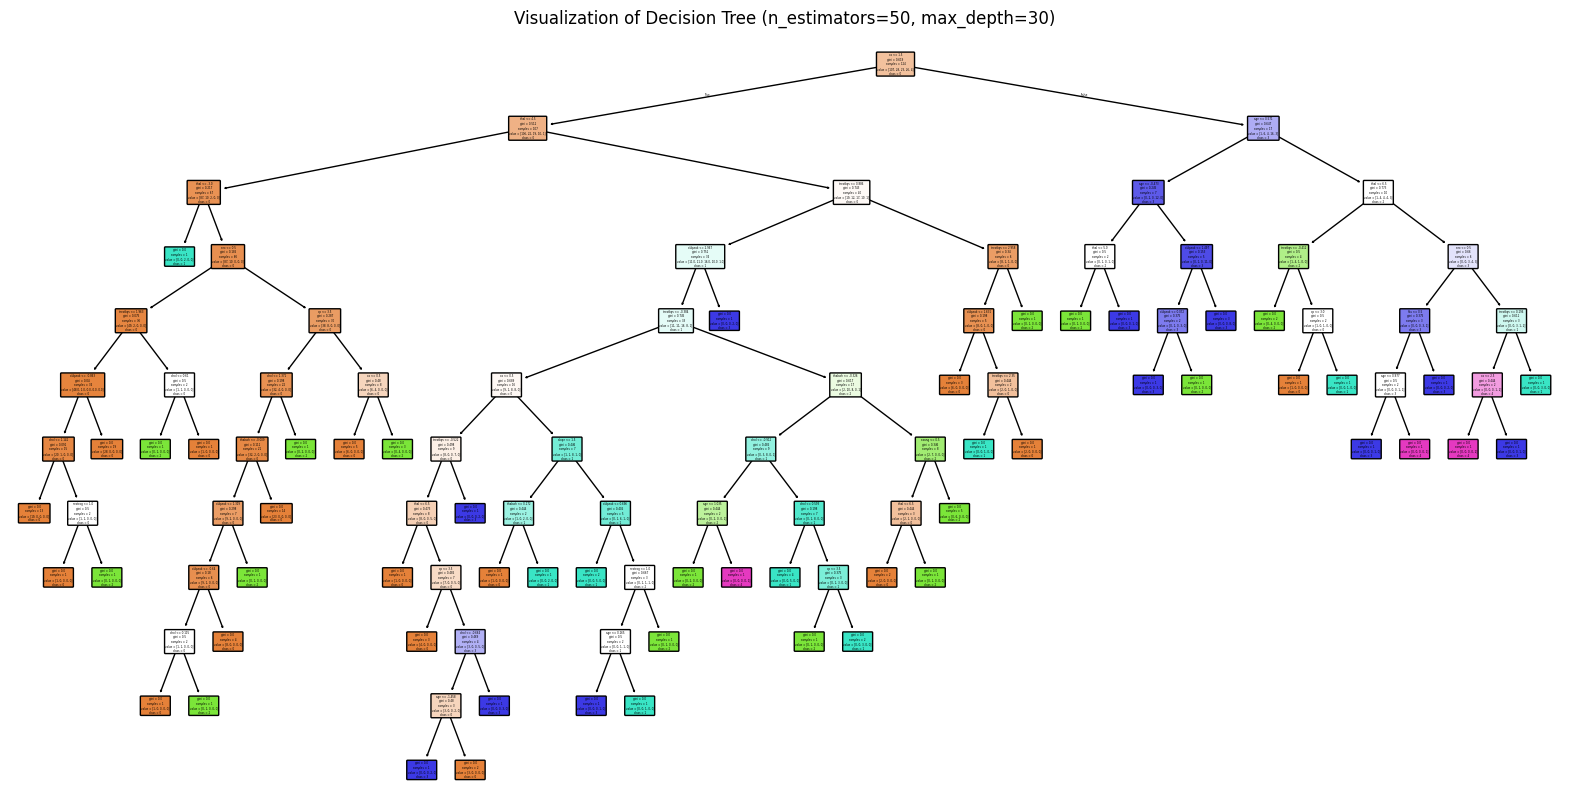

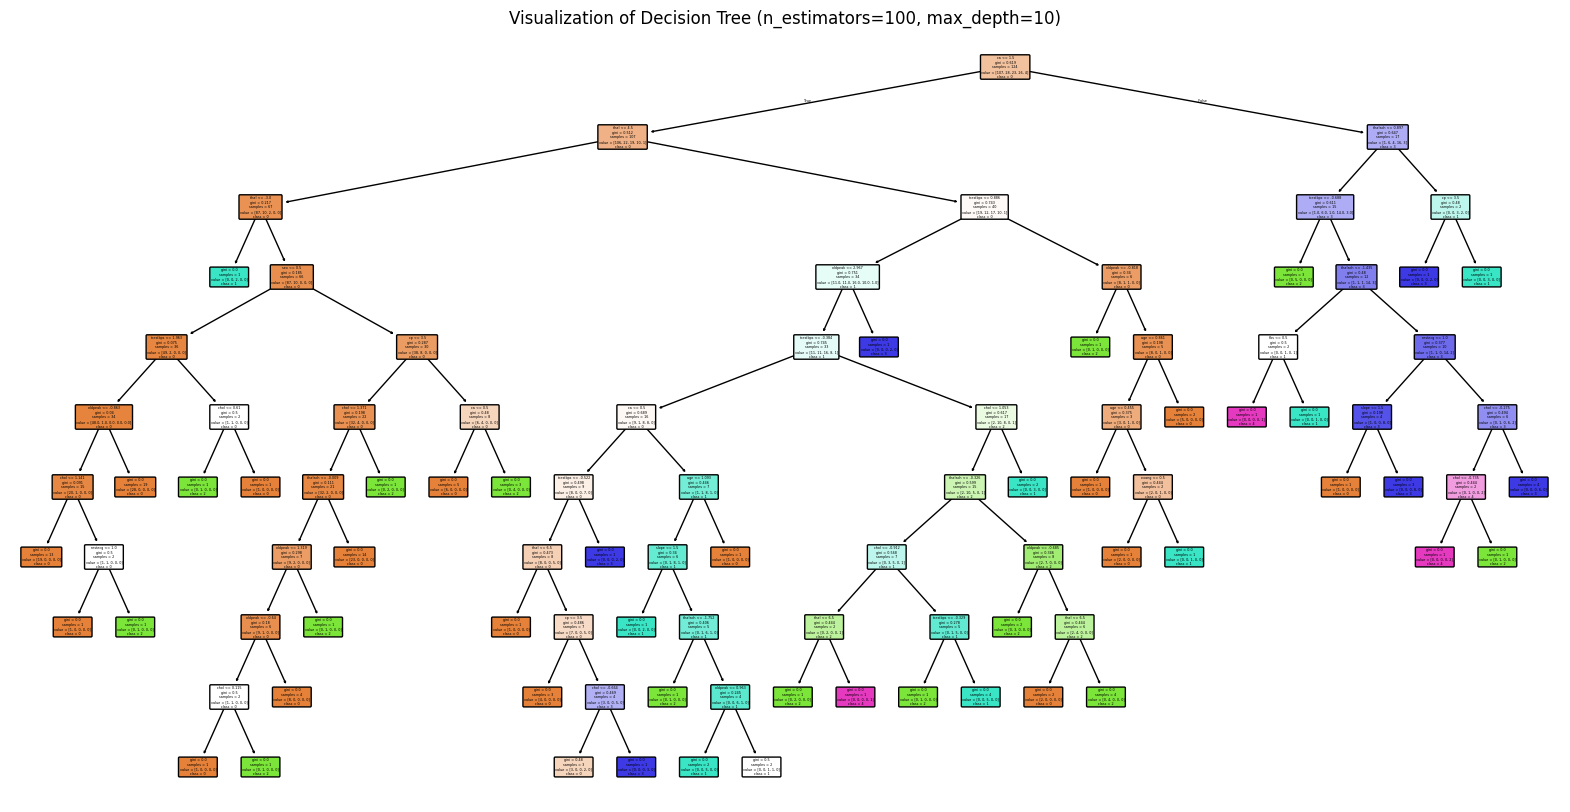

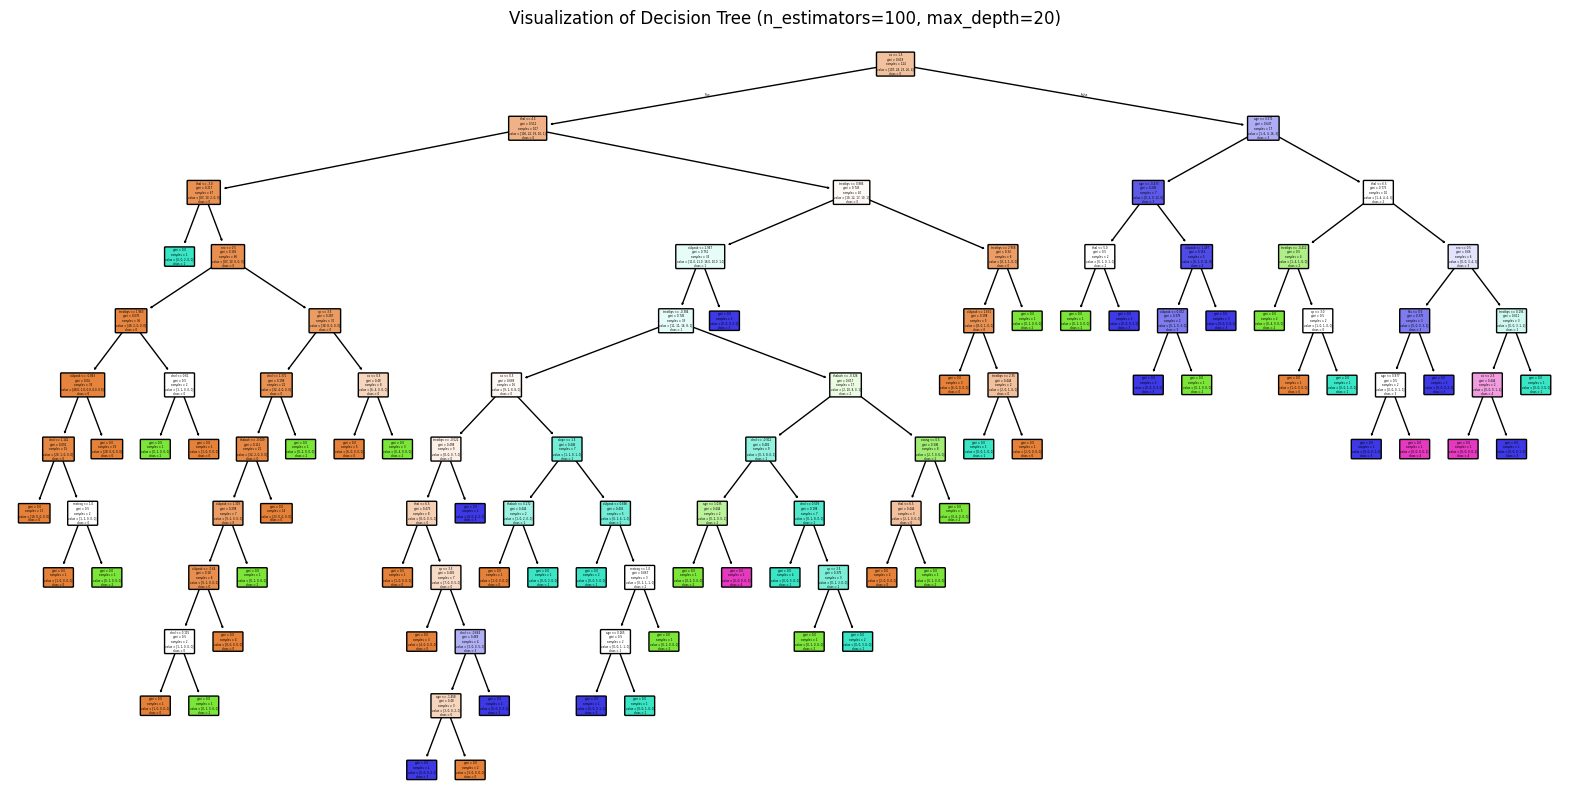

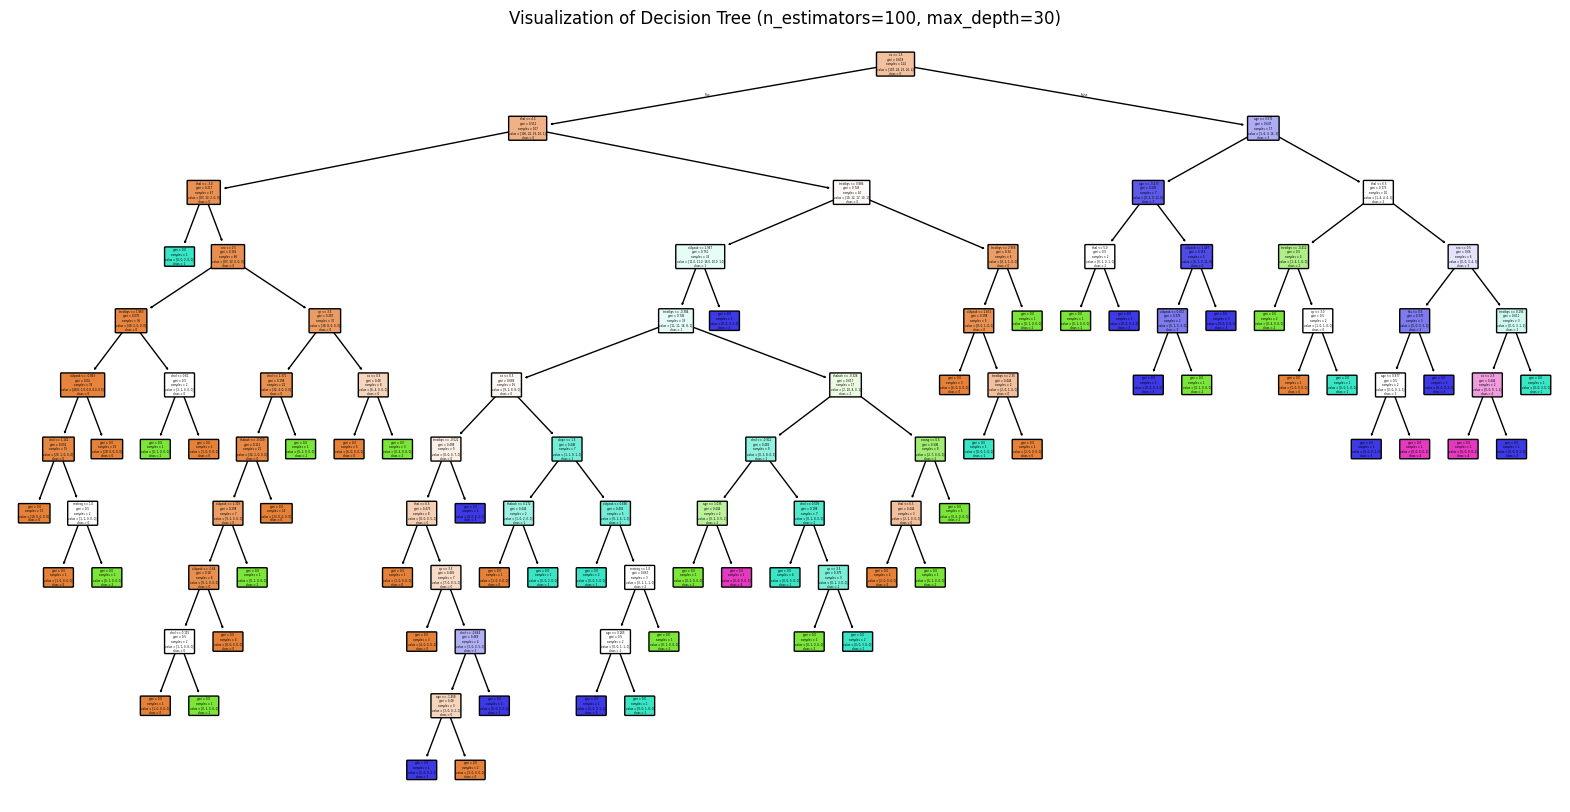

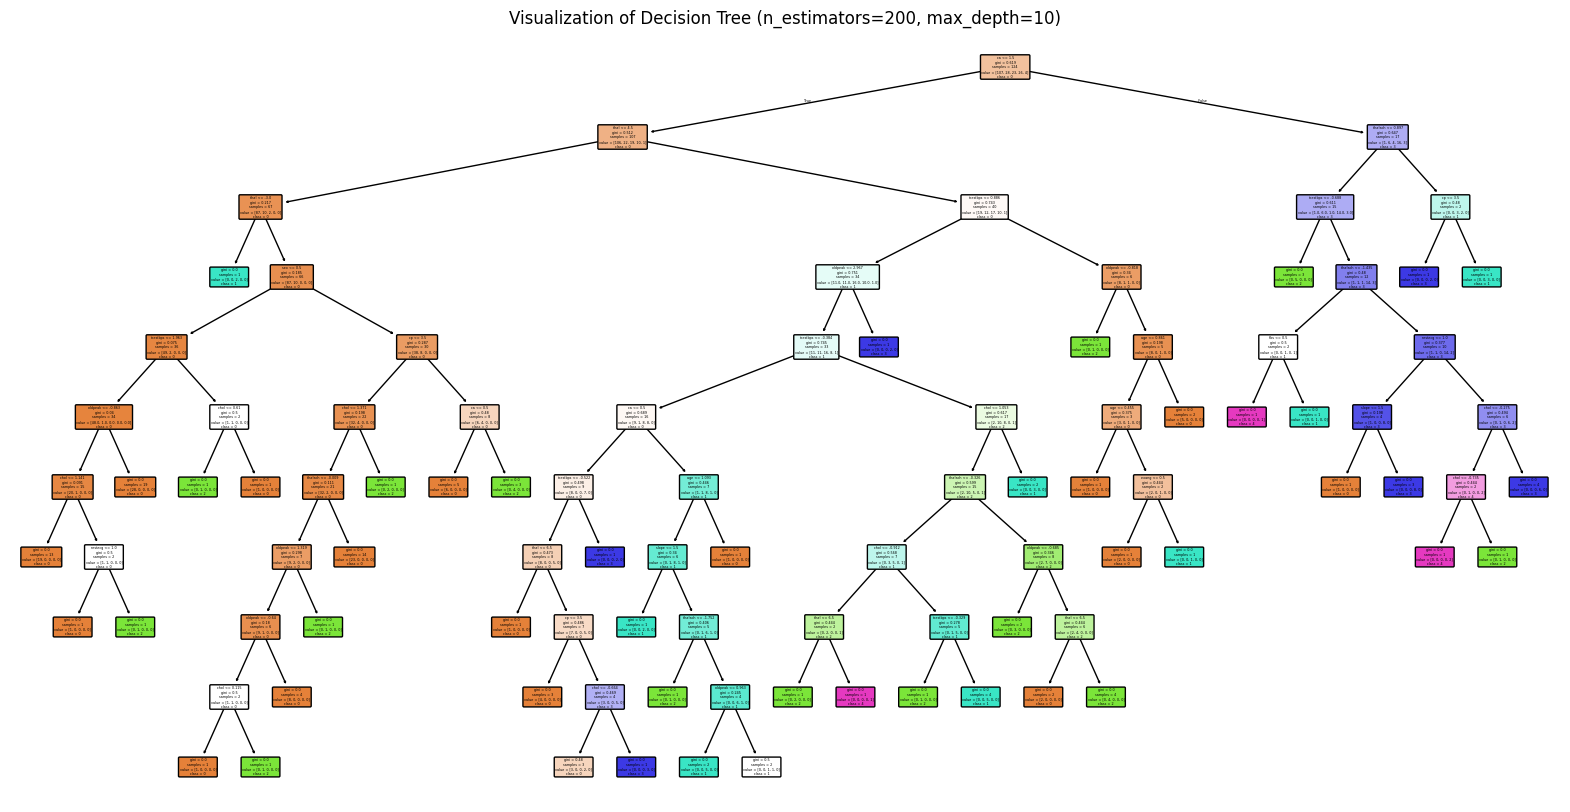

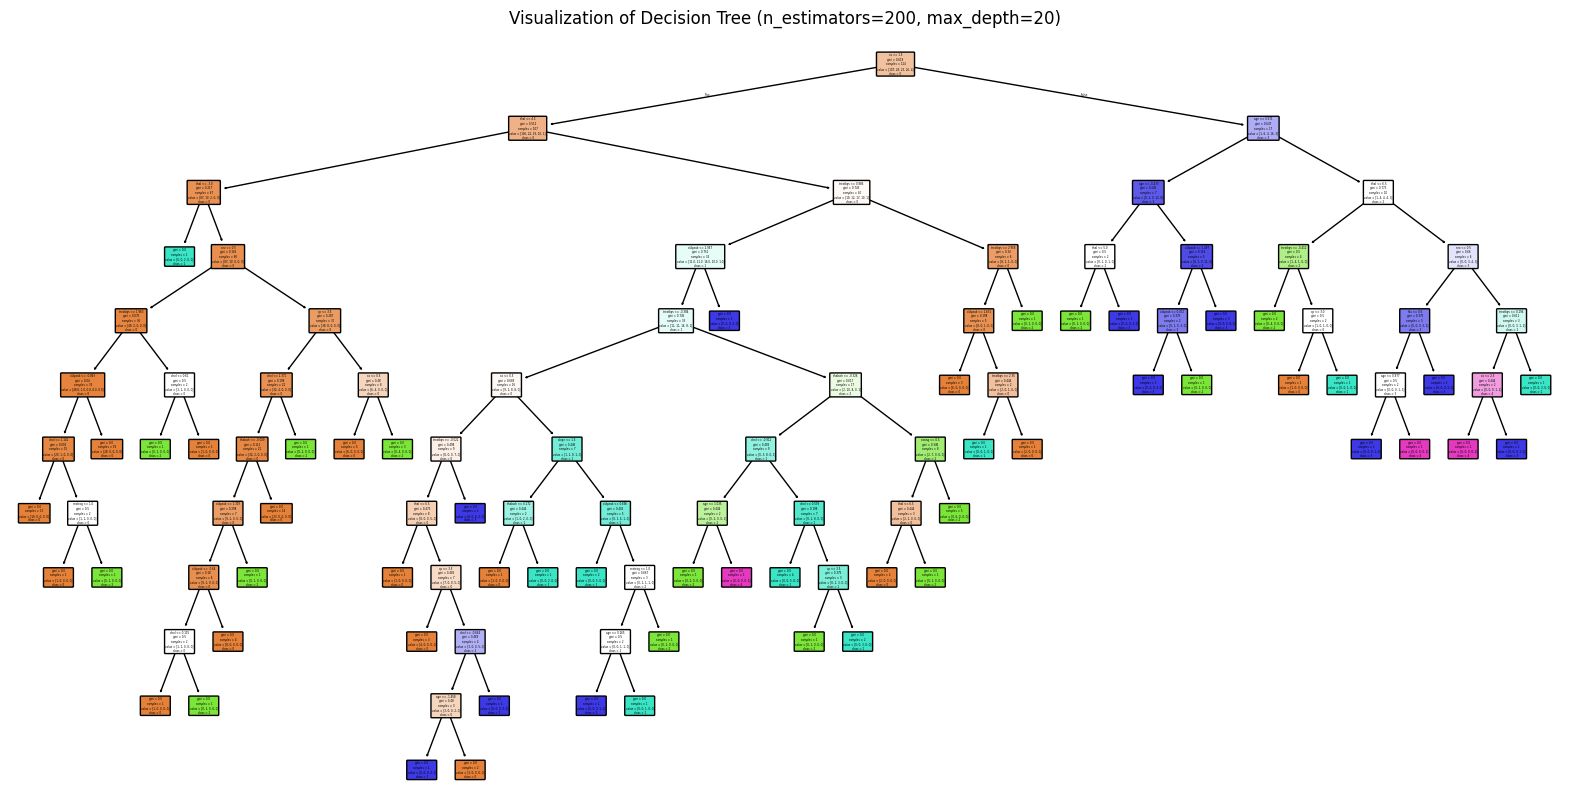

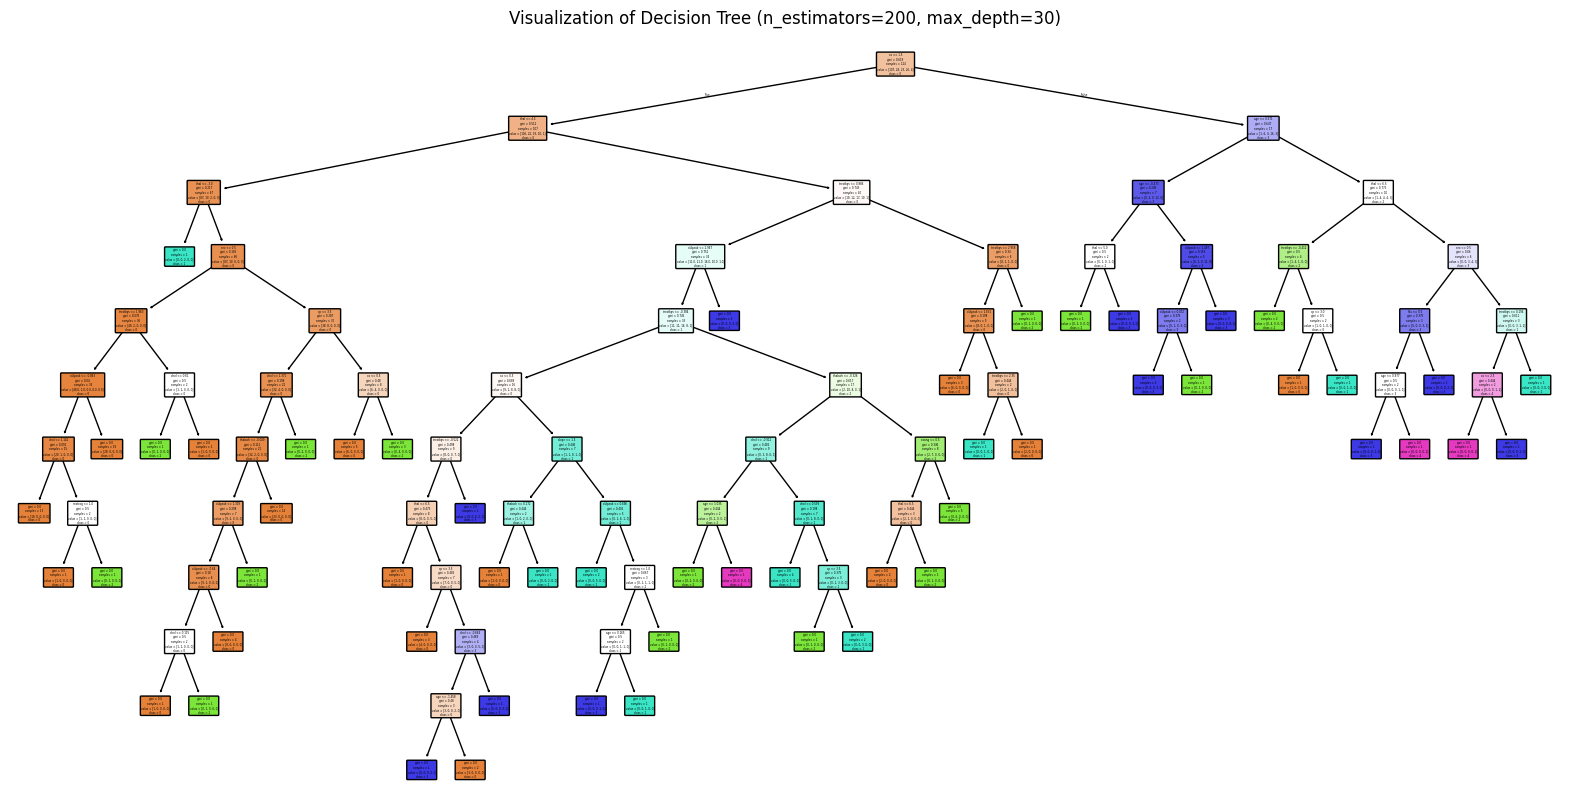

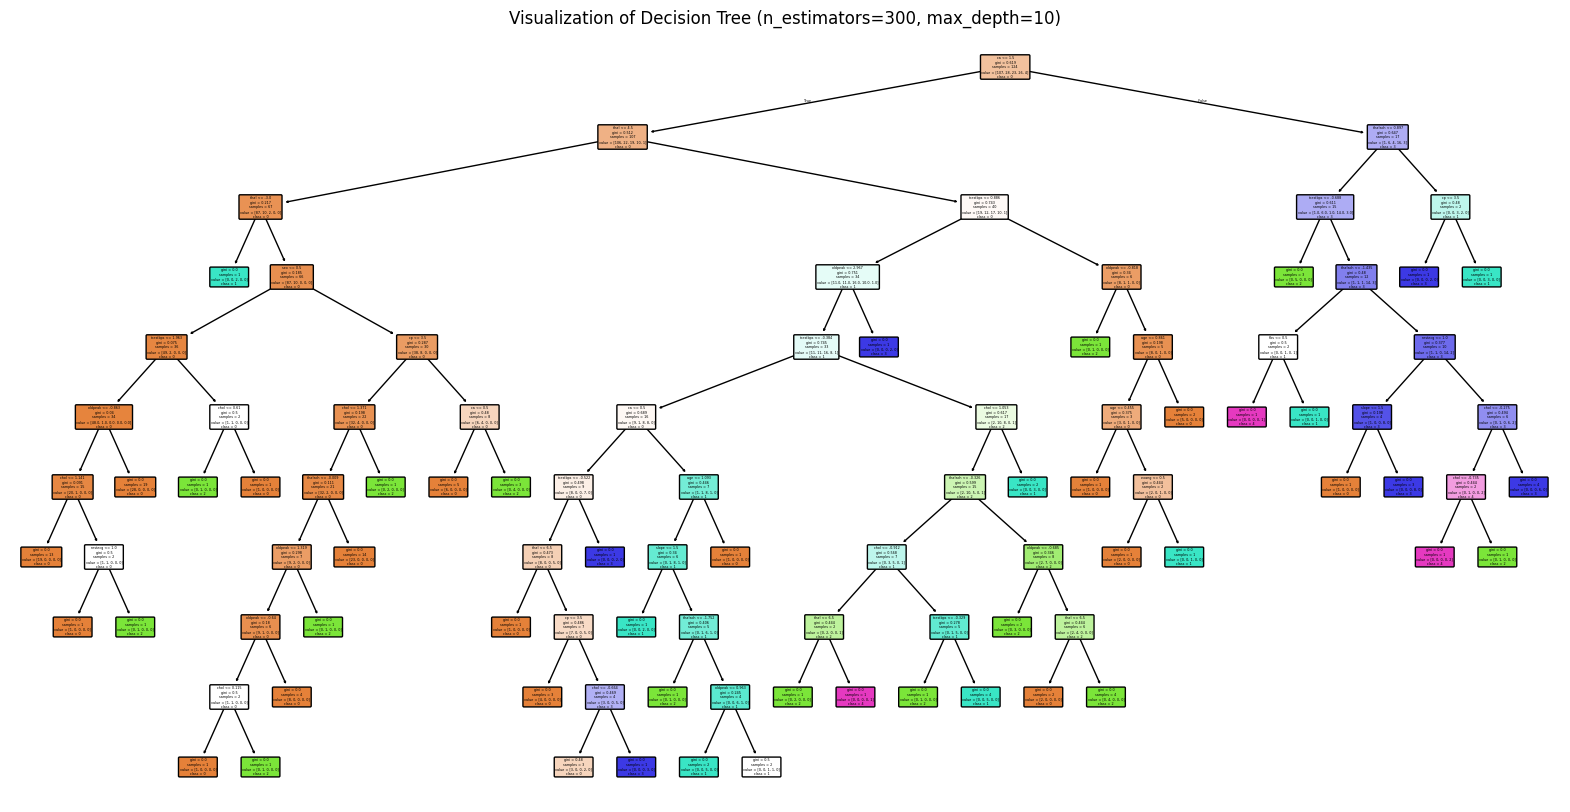

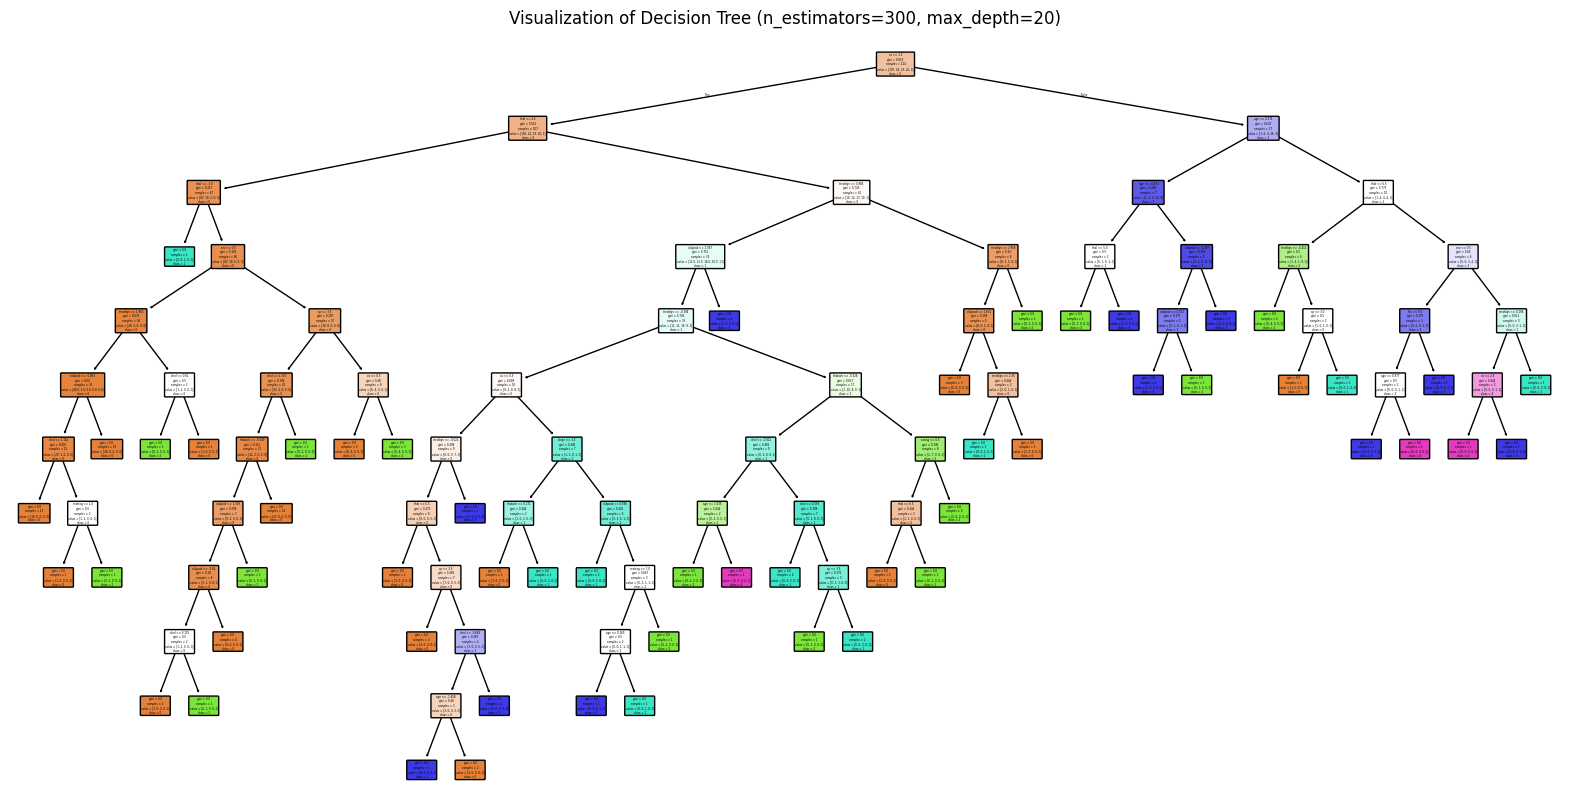

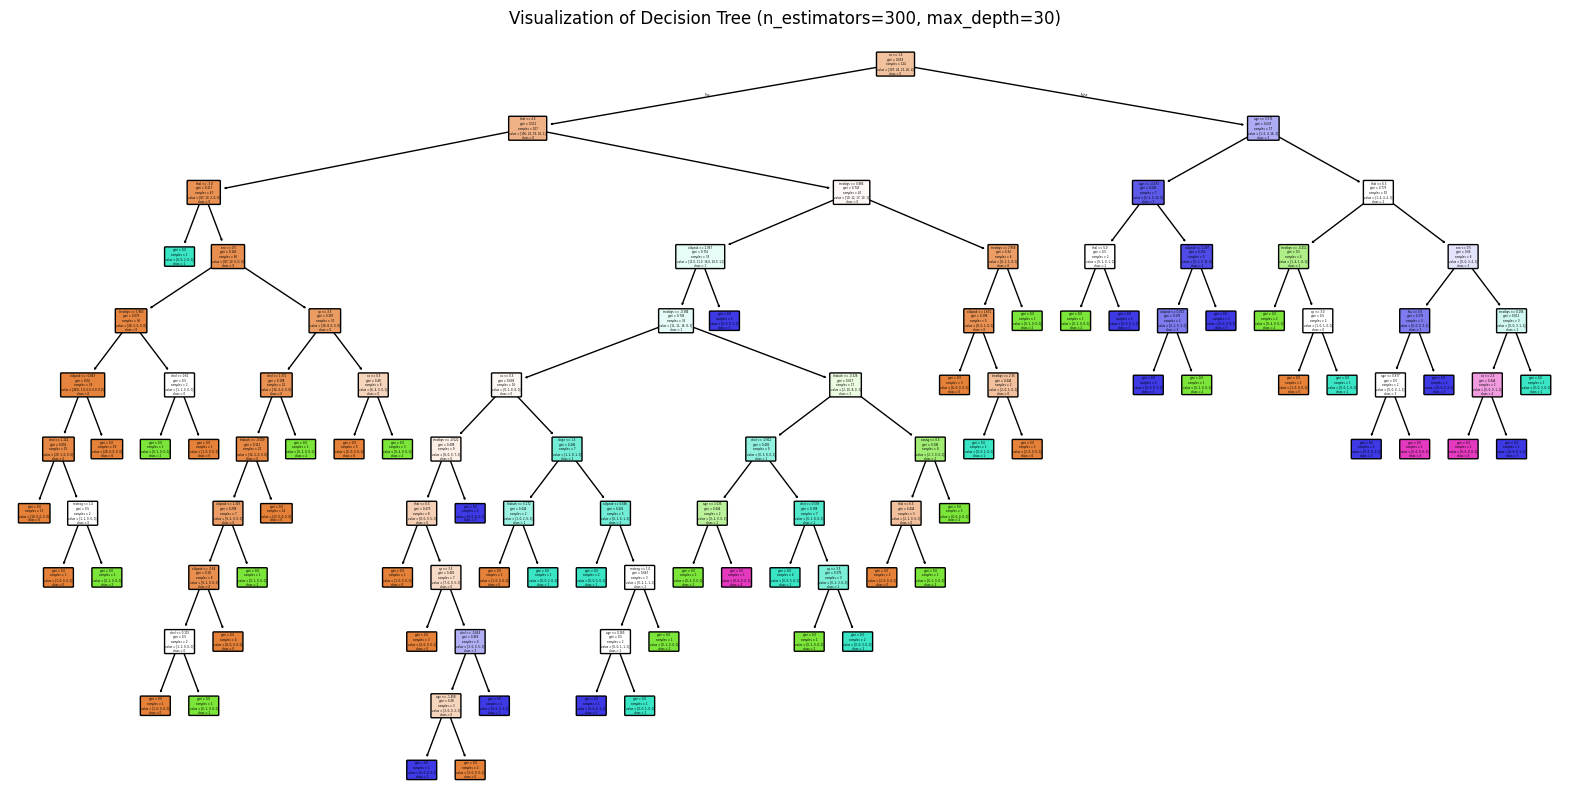

Results for n_estimators=50 and max_depth=10:
Confusion Matrix:
[[50  0  1  1  0]
 [11  4  2  0  0]
 [ 2  3  1  4  0]
 [ 2  4  2  3  0]
 [ 2  1  1  0  0]]
Total Net Benefit: 22100
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        52
           1       0.33      0.24      0.28        17
           2       0.14      0.10      0.12        10
           3       0.38      0.27      0.32        11
           4       0.00      0.00      0.00         4

    accuracy                           0.62        94
   macro avg       0.32      0.31      0.31        94
weighted avg       0.53      0.62      0.56        94

Accuracy: 0.62

********************************************************************************************************

Results for n_estimators=50 and max_depth=20:
Confusion Matrix:
[[50  0  1  1  0]
 [11  2  3  1  0]
 [ 2  2  2  4  0]
 [ 3  4  2  2  0]
 [ 2  1  1  0  0]]
Total Net Benefit: 19500
Classi

In [ ]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results = []

n_estimators_values = [50,100,200,300]
max_depth_values = [10,20,30]

for n_estimator in n_estimators_values:
  for max_depth in max_depth_values:
    random_Forest = RandomForestClassifier(n_estimators=n_estimator,
                                           max_depth=max_depth,
                                           min_samples_split=2,
                                           random_state=42)
    random_Forest.fit(x_train,y_train)
    y_pred = random_Forest.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results.append({
        "n_estimator":n_estimator,
        "max_depth":max_depth,
        "accuracy":accuracy,
        "confusion_matrix":cm,
        "classification_report":class_report})
    #Visualization.
    plt.figure(figsize=(20, 10))
    plot_tree(random_Forest.estimators_[0],
              filled=True, feature_names=x.columns,
              class_names=y.unique().astype(str), rounded=True)
    plt.title(f'Visualization of Decision Tree (n_estimators={n_estimator}, max_depth={max_depth})')
    plt.show()

for result in results:
    print(f"Results for n_estimators={result['n_estimator']} and max_depth={result['max_depth']}:")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    total_net_benefit = intervention_costs(result['confusion_matrix'])
    print(f"Total Net Benefit: {total_net_benefit}")
    print("Classification Report:")
    print(result['classification_report'])
    print(f"Accuracy: {result['accuracy']:.2f}\n")
    print("********************************************************************************************************\n")

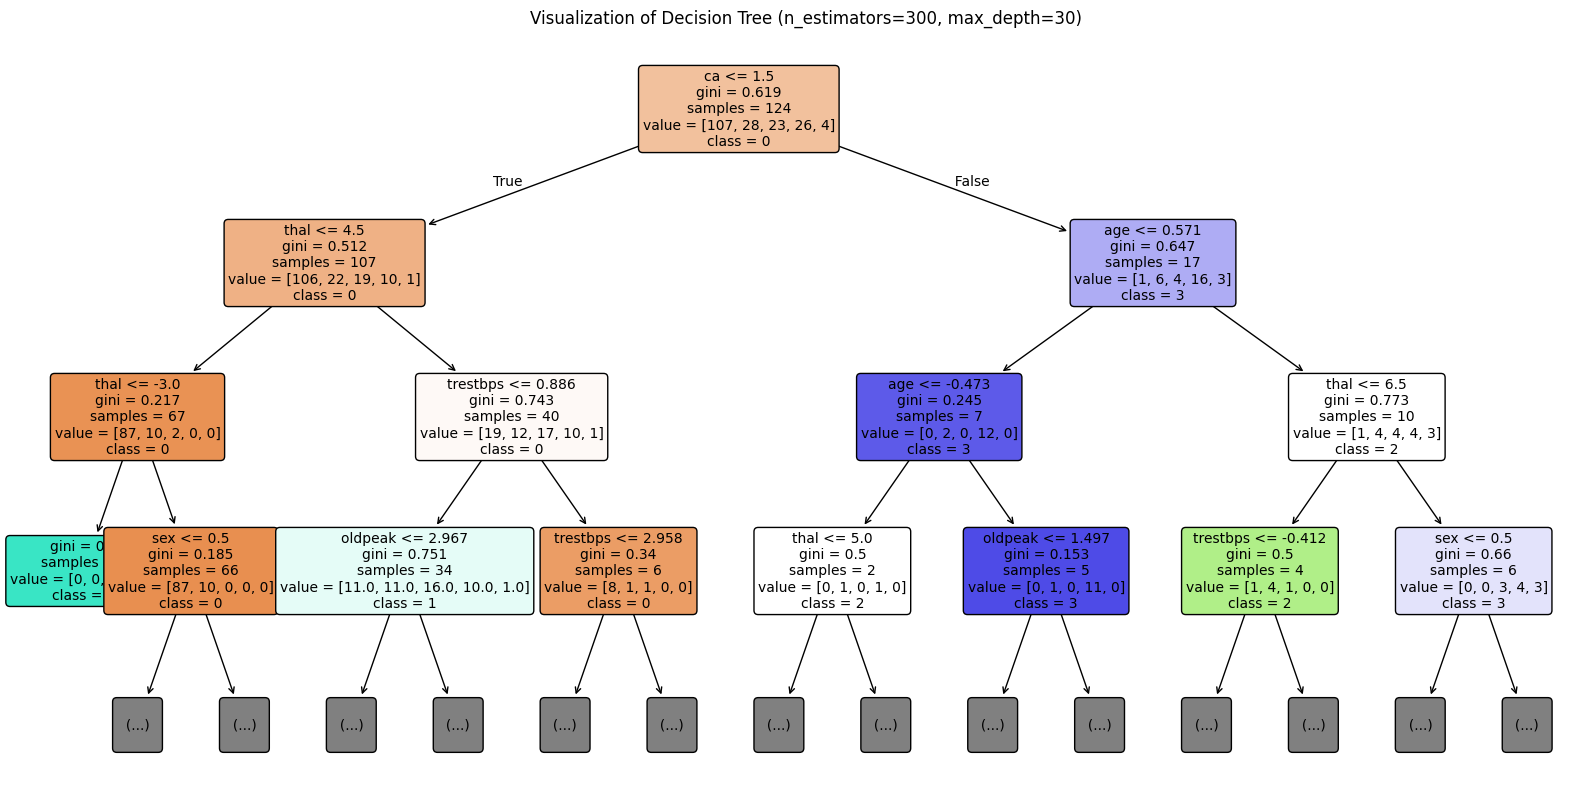

In [ ]:
# To improve the readability of the above visualization reduced the depth of the tress and increased the font size.
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(random_Forest.estimators_[0],
              filled=True, feature_names=x.columns,
              class_names=y.unique().astype(str), rounded=True, fontsize=10, max_depth=3)
plt.title(f'Visualization of Decision Tree (n_estimators={n_estimator}, max_depth={max_depth})')
plt.show()

The result of trying different combination of n_estimators and max_depth:
1. Class 0 is the most identifiable class because the recall value is reaching 1.0. with precision, recall, F1-scores above 0.73 in most of the cases.
2. Class 4 is the most struggling class amongst all with lowest precision and recall values as close as 0.
3. Other classes 1-3 are also struggling with class-1 showing gradual improvement as n_estimators increase.
4. Overall accuracy fluctuates around 59.5% - 63% meaning increasing the n_estimator value and max_depth doesn't help significantly beyond a point.The highest accuracy seen is 63% with n_estimators=200 and max_depth =10.





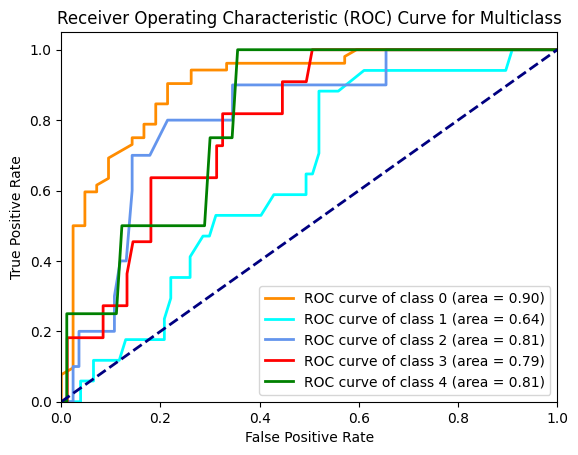

Macro-averaged ROC-AUC Score: 0.7889


In [ ]:
n_classes = len(set(y_test))  # Number of unique classes

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_proba = random_Forest.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
colors = ['darkorange','aqua', 'cornflowerblue','red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

macro_roc_auc = sum(roc_auc.values()) / n_classes
print(f"Macro-averaged ROC-AUC Score: {macro_roc_auc:.4f}")

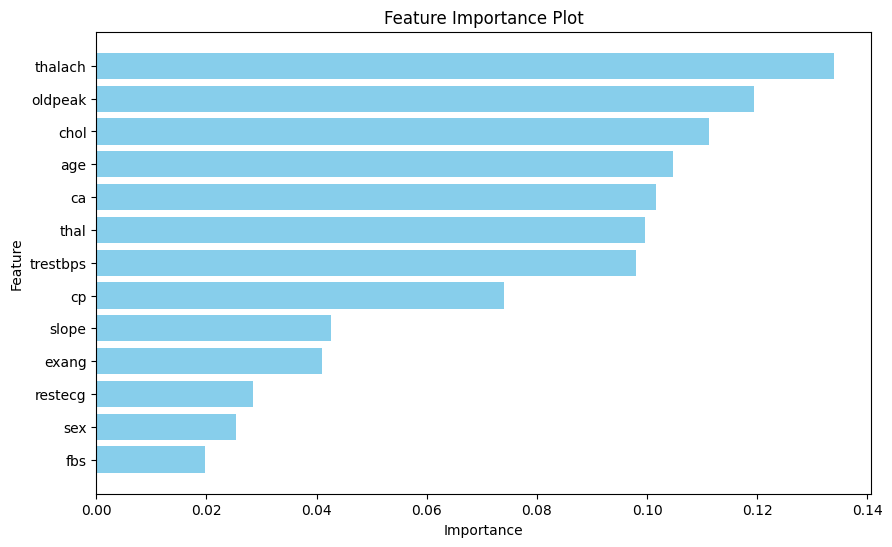

In [ ]:
importances = random_Forest.feature_importances_

# Get the feature names from the DataFrame
feature_names = x.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

The above bar plot represents the feature importance for the predictions of Random forest classifier. Maximum heart rate achieved (thalach) is the most important feature. Similarly features related to heart such as heart rate, cholesterol and exercise induced changes play the most significant role in predicting the outcomes.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the training data
x_res, y_res = rus.fit_resample(x_train, y_train)


clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(x_res, y_res)

y_pred = clf.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy: ", accuracy)
total_net_benefit = intervention_costs(conf_matrix)
print(f"Total Net Benefit: {total_net_benefit}")

Confusion Matrix:
 [[21  4  2  1  1]
 [ 4  1  1  2  1]
 [ 0  2  1  1  1]
 [ 2  1  0  3  3]
 [ 0  2  1  1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.10      0.11      0.11         9
           2       0.20      0.20      0.20         5
           3       0.38      0.33      0.35         9
           4       0.14      0.20      0.17         5

    accuracy                           0.47        57
   macro avg       0.32      0.31      0.31        57
weighted avg       0.50      0.47      0.49        57


Accuracy:  0.47368421052631576
Total Net Benefit: 8600


Since the Class 0 data was widely available in the dataset where as there was less data avialble for class1-4, I tried undersampling the the dataset. But it reduced the accuracy score significantly. But improving recall and precision for class 1 and 4 very slightly. Also the total cost benefit value is also reduced. Hence it's not an ideal remedy.

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

* Advantages of using Random Forest classifier:
1. Random forest classifier helped in doing feature importance analysis.
* Disadvantages of using Random Forest classifier:
1. Even though random forest classifier was supposed to handle class imbalances effectively it lacked to improve the accuracy over KNN classifier.
2. Increasing the deapth and number of estimators the accuracy didn't improve very significantly.
3. Since the given data has a bias in class 0 and rest of the classes I tried undersampling the data but it adversely affected the accuracy of the model.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

**Logistic Regression:**
Setup Parameters.
1. solver : solver 'lbfgs' supports both binary and multiclass classification. Recommended for small to medium sized datasets.
2. multiclass : 'multinomial' is used since the data set is multiclass. 'OvR' will be used for one vs rest kind of classification.
3. max_iter: maximum number of iterations. for this setting I have set it to 500 for achieveing convergence because it's a multiclass dataset.
4. C: it is the inverse of regularization strength. A lower value means stronger regularization.




***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression with different C values
C_values = [0.1, 1.0, 10,100]

for C in C_values:
    print(f"\nEvaluating Logistic Regression with C = {C}")

    # Create the Logistic Regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, C=C)

    # Fit the model
    model.fit(x_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Evaluate performance
    cm= confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Total Net Benefit
    total_net_benefit = intervention_costs(cm)
    print(f"Total Net Benefit: {total_net_benefit}")


Evaluating Logistic Regression with C = 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Confusion Matrix:
[[26  2  0  1  0]
 [ 6  0  2  1  0]
 [ 1  2  0  2  0]
 [ 2  3  2  0  2]
 [ 2  0  1  2  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         5

    accuracy                           0.46        57
   macro avg       0.14      0.18      0.16        57
weighted avg       0.36      0.46      0.40        57

Accuracy: 0.4561
Total Net Benefit: 3000

Evaluating Logistic Regression with C = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Confusion Matrix:
[[25  3  0  1  0]
 [ 5  2  1  1  0]
 [ 1  0  0  4  0]
 [ 2  3  3  1  0]
 [ 2  0  1  2  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.25      0.22      0.24         9
           2       0.00      0.00      0.00         5
           3       0.11      0.11      0.11         9
           4       0.00      0.00      0.00         5

    accuracy                           0.49        57
   macro avg       0.22      0.24      0.23        57
weighted avg       0.42      0.49      0.45        57

Accuracy: 0.4912
Total Net Benefit: 6300

Evaluating Logistic Regression with C = 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Confusion Matrix:
[[25  3  0  1  0]
 [ 5  2  1  1  0]
 [ 2  0  0  3  0]
 [ 1  3  2  3  0]
 [ 2  0  0  3  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.25      0.22      0.24         9
           2       0.00      0.00      0.00         5
           3       0.27      0.33      0.30         9
           4       0.00      0.00      0.00         5

    accuracy                           0.53        57
   macro avg       0.25      0.28      0.26        57
weighted avg       0.45      0.53      0.48        57

Accuracy: 0.5263
Total Net Benefit: 10100

Evaluating Logistic Regression with C = 100
Confusion Matrix:
[[25  3  0  1  0]
 [ 5  2  1  1  0]
 [ 1  1  0  3  0]
 [ 2  3  3  1  0]
 [ 2  0  0  3  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.22      0.22      0.22      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***



* Logistic regression model is having less accuracy than the KNN classifier.
* Also the Total Net Benefit is lower as compared to KNN classifier.
* Logistic regression classifier is not particularly helpful with imbalanced data.
* Since the data is having non linear patterns logistic regression struggles to improve the performance.
* The convergence issue suggests that the classifier is not suitable for this kind of multi-class dataset.  



***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?
***



1. KNN Classifier:
  Strong Points -
* Class 0 has achieved high precision and recall consistently for all the K values I have tried which reflects that it is efficient in identifying individuals with low heart risk.
* For K=9 the net benefit reaches 21,400 which implies it's efficient if configured properly.
  Weak Points -
* Under represented classes in the datset like class 4 are poorly classified by KNN. In context to health risk this will be costly is individuals with extreme heart health risk are miss-classified.
2. Random Forest:
  Strong Points -
* Accuracy of the Random forest classifier is better as the number of trees (n_estimator) increase. This results in improvement in the net_benefit going upto 22,400.
* Random forest was being used to tackle the mutli-class imbalance with the help of weights.
  Weak Points -
* Even after tweaking the parameters of the classifier it didn't solve the class imbalance issue. After increasing the depth of the trees it didn't show any effect on the outcomes.
* It is hard to interpret the outcomes of Random Forest.
3. Logistic Regression:
  Strong Points -
* It is easy to interpret.
  Weak Points -
* The model can't handle the imbalanced classes in the dataset.
* It struggles to classify the samples due to complexity of data.
* The classifier is not suitable to classify non linear relationships.


***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

Random Forest Classifier is the best for the given dataset. Since it provides good classification of the samples. Even though the dataset is having class imbalance it provides a decently balance classification for each class. Class 0 is the dominant class but Class 1-4 is classified better as compared to other classifiers.From the context of Health risk and net benefit the outcomes from setting n_estimators:500 the net_benefit of 22,400$ is the highest amongst all the classifiers. Hence with Random forest classifier the heart disease risk for a patient will be classified accurately ensuring great net_benefit considering the currently given dataset.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight?
***

  This homework required to implement the data preprocessing along with fitting and optimizing 3 of the most commonly used classifiers (i.e KNN, Random forest and Logistic regression). After fitting the KNN model I descovered that the dataset has imbalance and it is biased towards class 0 samples. Even though I was able to achieve 0.90 accuracy value that for class 0 that doesn't imply that the model was successful. I was able to apply the concepts like recall and precision to identify that the underrepresented classes are also very important for the model to be used as a classifier.
  Since the given dataset deals with the medical data it proposed the next challenge where I can't solve the overfitting issue just by adding new data. Hence I tried undersampling in random forest classifier but it didn't give optimal result. In medical each class is very important since it can be very costly to miss predict even a single patient data.
  The given cost analysis logic (Net_benefit) allowed to use cost matrix concept and judge the model not just on the accuracy but the impact of it in actual world.
  If I had additional data and time it would be interesting to explore more techniques to avoid overfitting of data and finally get a balanced classifier based on that data. Also it would be interesting to compare the outcomes of every classifier from the conetxt of medical science. It would help in comprehending the effect of classification models on real world scenarios.

***
### END-OF-SUBMISSION
***